**Description:** The project focuses on developing and evaluating dynamic pricing models for retail. It compares traditional statistical methods like ARIMA with ensemble learning techniques, such as Random Forests. 

**Research Problem:** Traditional models often struggle with complex data patterns and large datasets. The problem is to determine whether advanced ensemble learning techniques can outperform traditional time-series models in predicting optimal prices.

### Strategies for Dynamic Pricing:
1. **Rule-Based Pricing:** Setting prices based on predefined rules like competitor prices, stock levels, or markdown schedules. Works well as a baseline for both model types.
2. **Demand Forecasting:** Predicting future demand to adjust prices dynamically, commonly used in time-series models.
3. **Elasticity-Based Pricing:** Adjusting prices based on the estimated price elasticity of demand, often implemented using ensemble models for non-linear relationships.
4. **Optimization-Based Pricing:** Using optimization algorithms to maximize revenue or profit by integrating model predictions with constraints like inventory and competitor prices.
5. **Context-Aware Pricing:** Leveraging additional factors like seasonality, promotions, or customer behavior, often better captured by ensemble models due to their feature flexibility.

### Differences in Strategies:
1. **Time-Series Models:** Focus on temporal patterns and demand forecasting, relying heavily on historical sales and seasonality trends.
2. **Ensemble Models:** Incorporate broader feature sets (e.g., competitor prices, customer ratings) and excel in capturing complex, non-linear relationships, making them suitable for context-aware and elasticity-based pricing.

### Data Understanding
This dataset provides synthetic yet realistic data for analyzing and forecasting retail store inventory demand. It contains over 73000 rows of daily data across multiple stores and products, including attributes like sales, inventory levels, pricing, weather, promotions, and holidays.

1. Date: Daily records from [start_date] to [end_date].
2. Store ID & Product ID: Unique identifiers for stores and products.
3. Category: Product categories like Electronics, Clothing, Groceries, etc.
4. Region: Geographic region of the store.
5. Inventory Level: Stock available at the beginning of the day.
6. Units Sold: Units sold during the day.
7. Demand Forecast: Predicted demand based on past trends.
8. Weather Condition: Daily weather impacting sales.
9. Holiday/Promotion: Indicators for holidays or promotions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [2]:
dataset = pd.read_csv("Datasets/retail_store_inventory.csv")

In [3]:
dataset.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               66.16      Autumn  
2             Sunny                  1               31.32      Summer  
3            Cloudy                  1               34.74      Autumn  
4             Sunny                  0               68.95      Summer

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

### Exploratory Data Analysis

In [5]:
dataset.describe()

Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.000000           0.000000            5.030000  
25%       32.650000      5.000000           0.000000           32.680000  
50%       55.050000     10.000000           0.000000           55.010000  
75%       77.860000     15.000000           1.000000           77.820000  
max      100.000000     20.000000           1.000000          104.940000

In [6]:
dataset.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [7]:
dataset.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

##### What is the overall distribution of prices?
(Understanding price distribution helps identify common price ranges and outliers.)

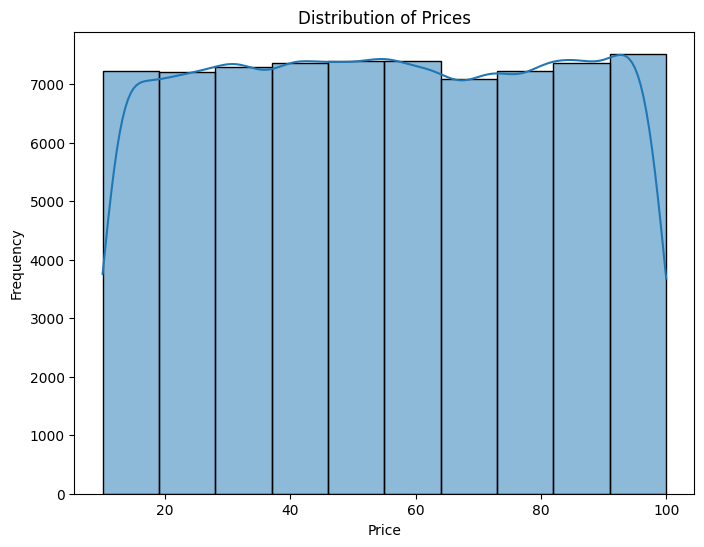

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Price'], bins=10, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

> The prices in the dataset are relatively uniformly distributed. This means there's no single price range that dominates the dataset; prices are spread out evenly across the entire range.  

(Prices are uniformly distributed, we might want to explore dynamic pricing strategies that consider contextual factors like demand, inventory levels, or competitor pricing to find opportunities for optimizing prices.)

##### How do sales volumes vary across different price points?
(This reveals the demand elasticity and how price changes affect sales.)

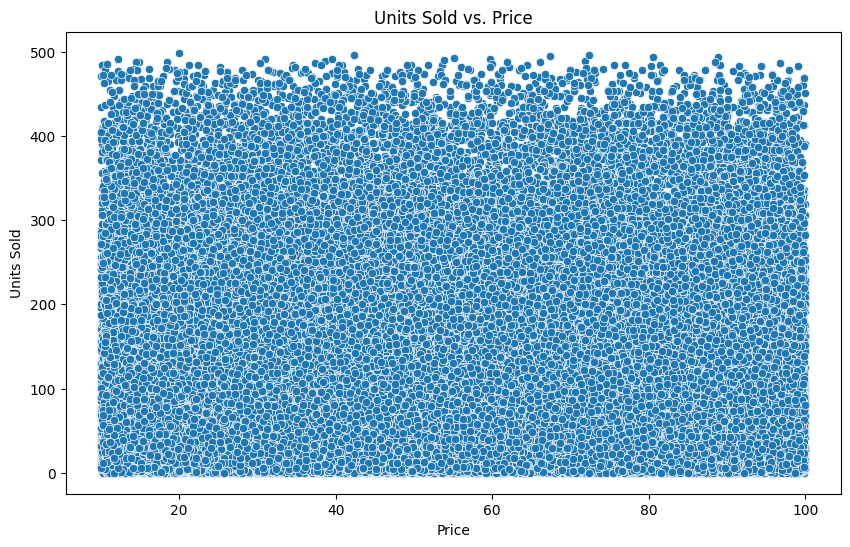

In [9]:
# Plotting Units Sold against Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Price', y='Units Sold')
plt.title('Units Sold vs. Price')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.show()

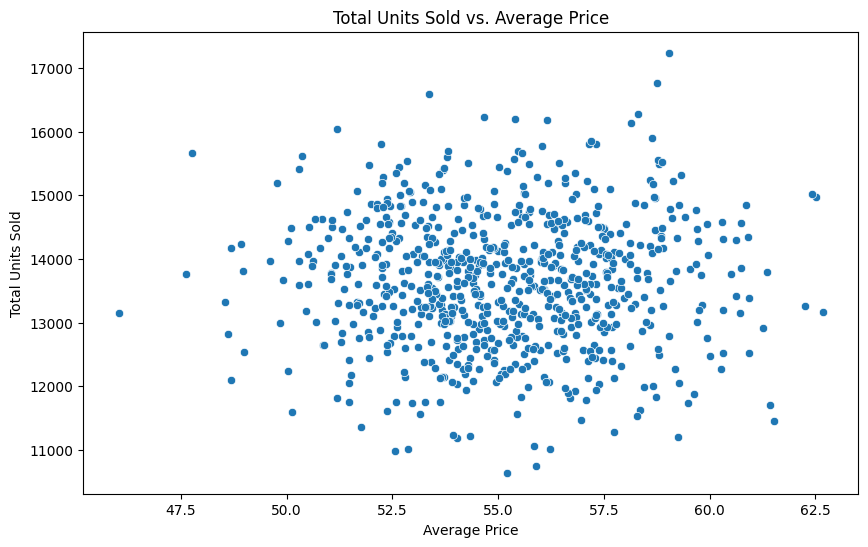

In [10]:
# Grouping by date to get total units sold and average price
daily_sales = dataset.groupby('Date').agg({'Units Sold': 'sum', 'Price': 'mean'}).reset_index()

# Plotting Total Units Sold vs. Average Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_sales, x='Price', y='Units Sold')
plt.title('Total Units Sold vs. Average Price')
plt.xlabel('Average Price')
plt.ylabel('Total Units Sold')
plt.show()

> The relationship between price and sales might not be linear or direct. It might involve more complex interactions with other variables like seasonality, inventory levels, or promotions.

##### What are the monthly trends in sales and prices?
(Identifies the impact of monthly on pricing and demand.)

In [11]:
# Convert the 'Date' column to datetime format.
dataset['Date'] = pd.to_datetime(dataset['Date'])  # Ensure 'Date' is in datetime format
dataset['Month'] = dataset['Date'].dt.month  # Extract month for seasonal analysis

In [12]:
# Group by month to get average sales and prices
# Group the dataset by month to calculate the average sales and prices for each month.
monthly_sales = dataset.groupby('Month')['Units Sold'].mean().reset_index()
monthly_prices = dataset.groupby('Month')['Price'].mean().reset_index()

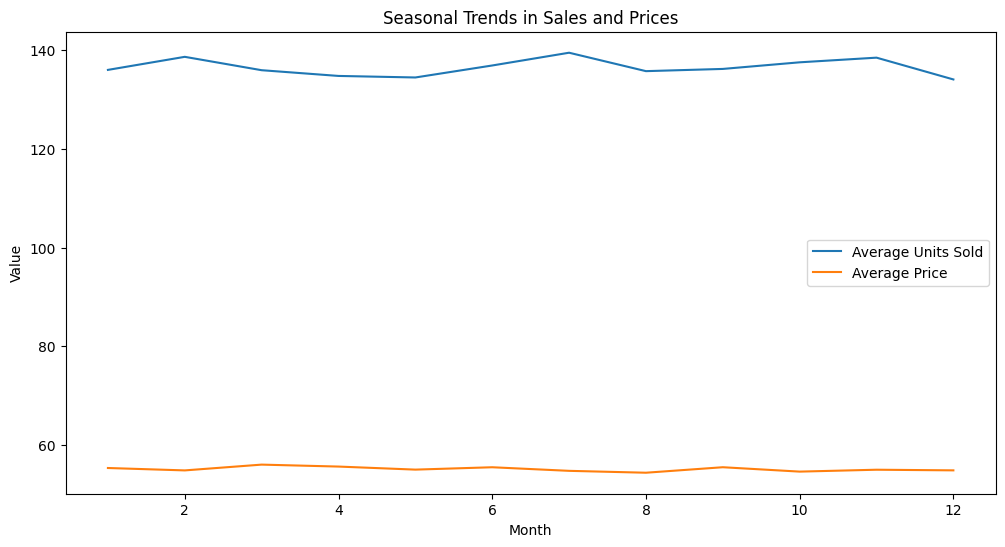

In [13]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Units Sold', ax=ax1, label='Average Units Sold')
sns.lineplot(data=monthly_prices, x='Month', y='Price', ax=ax1, label='Average Price')
ax1.set_xlabel('Month')
ax1.set_ylabel('Value')
ax1.set_title('Seasonal Trends in Sales and Prices')
plt.legend()
plt.show()


> The almost horizontal line for average price indicates that prices remain relatively stable throughout the year.  
> The tops in the sales line suggest that there are specific periods when sales peak, likely influenced by factors like promotions, holidays, or seasonal demand.

##### What are the seasonal trends in sales and prices?
(Identifies the impact of seasonality on pricing and demand.)

In [14]:
# Group by 'Seasonality' to get average sales and prices
seasonal_sales = dataset.groupby('Seasonality')['Units Sold'].mean().reset_index()
seasonal_prices = dataset.groupby('Seasonality')['Price'].mean().reset_index()

# Merging sales and prices for easier plotting
seasonal_trends = pd.merge(seasonal_sales, seasonal_prices, on='Seasonality')

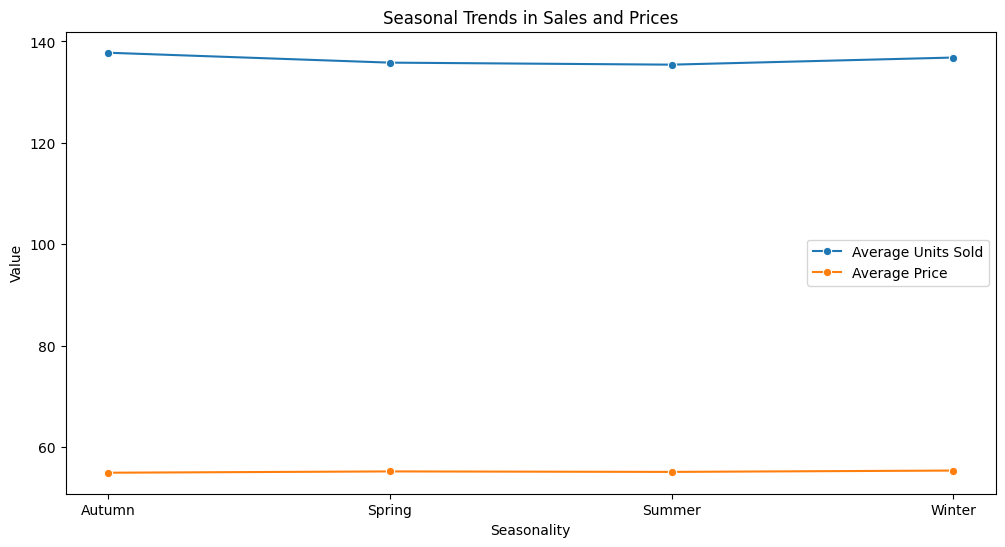

In [15]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=seasonal_trends, x='Seasonality', y='Units Sold', marker='o', ax=ax1, label='Average Units Sold')
sns.lineplot(data=seasonal_trends, x='Seasonality', y='Price', marker='o', ax=ax1, label='Average Price')
ax1.set_xlabel('Seasonality')
ax1.set_ylabel('Value')
ax1.set_title('Seasonal Trends in Sales and Prices')
plt.legend()
plt.show()

> Average units sold decreases in spring and summer and increases in autumn and winter.

##### How do prices vary across different product categories?
(Different categories may have different optimal pricing strategies.)

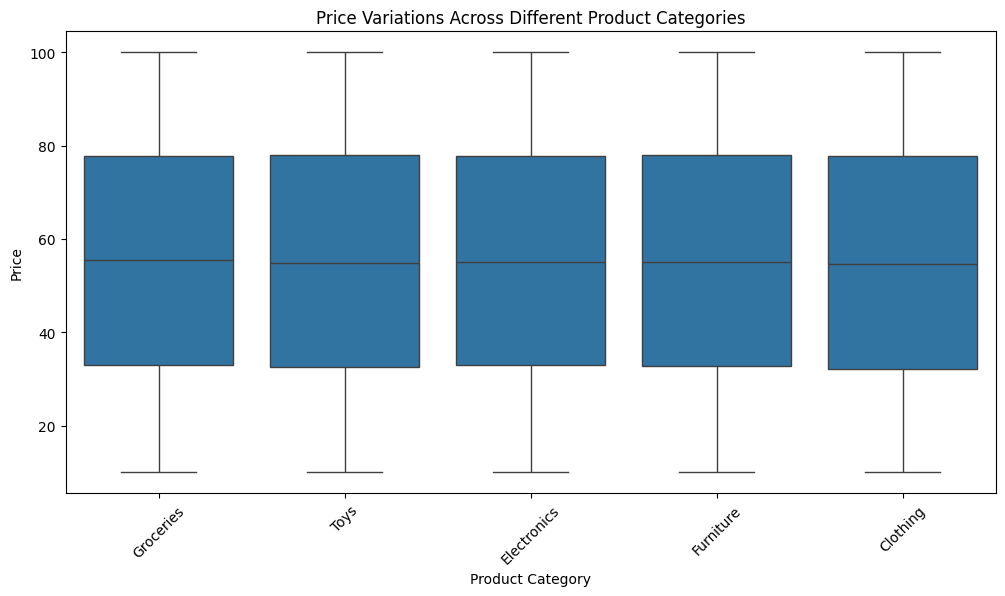

In [16]:
# Create a boxplot to visualize price variations across different product categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=dataset) # Seaborn’s boxplot function handles the grouping internally, so you don’t need to perform any additional grouping steps manually,
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Price Variations Across Different Product Categories')
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.show()

> The boxplots are identical it, suggests that there is little to no variation in pricing across the different product categories.   
> If the dataset is accurate, it indicates that the pricing strategy for different categories is highly uniform, and there’s little need for category-specific pricing strategies.

In [17]:
# Inspect a sample of the dataset for different categories
sample_data = dataset.groupby('Category').head(5)  # Get first 5 entries for each category
print(sample_data[['Category', 'Price']])


       Category  Price
0     Groceries  33.50
1          Toys  63.01
2          Toys  27.99
3          Toys  32.72
4   Electronics  73.64
5     Groceries  76.83
6     Furniture  34.16
7      Clothing  97.99
8   Electronics  20.74
9          Toys  59.99
10    Furniture  58.53
11     Clothing  58.25
12         Toys  43.60
13     Clothing  78.11
14     Clothing  92.99
15  Electronics  21.90
17     Clothing  19.57
20    Groceries  32.80
22    Furniture  20.46
25    Furniture  85.59
26    Groceries  91.13
27  Electronics  66.96
29  Electronics  60.84
30    Groceries  34.62
52    Furniture  73.98


##### What are the regional variations in pricing and sales?
(Pricing may need to be adjusted based on regional demand and competition.)

In [18]:
# Group by 'Region' and calculate the average price and average units sold
regional_prices = dataset.groupby('Region')['Price'].mean().reset_index()
regional_sales = dataset.groupby('Region')['Units Sold'].mean().reset_index()

In [19]:
regional_prices.head()

Region      Price
0   East  55.184385
1  North  55.315522
2  South  55.043126
3   West  54.997406

In [20]:
regional_sales.head()

Region  Units Sold
0   East  136.861137
1  North  136.326860
2  South  137.060666
3   West  135.605838

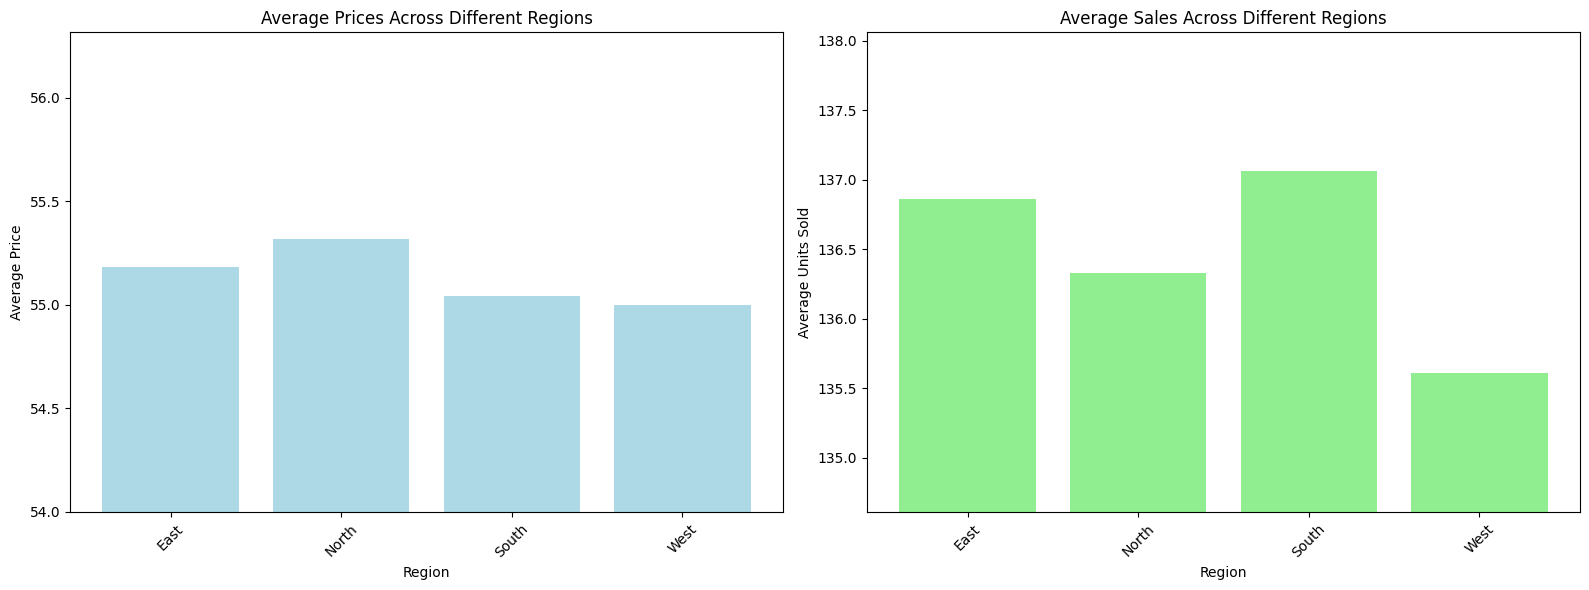

In [21]:
# Finding the range of the data for better axis limits
min_price, max_price = regional_prices['Price'].min(), regional_prices['Price'].max()
min_sales, max_sales = regional_sales['Units Sold'].min(), regional_sales['Units Sold'].max()

# Plotting
fig, ax1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot for regional prices
ax1[0].bar(regional_prices['Region'], regional_prices['Price'], color='lightblue')
ax1[0].set_xlabel('Region')
ax1[0].set_ylabel('Average Price')
ax1[0].set_title('Average Prices Across Different Regions')
ax1[0].tick_params(axis='x', rotation=45)
ax1[0].set_ylim(min_price - 1, max_price + 1)  # Adjust y-axis limits

# Plot for regional sales
ax1[1].bar(regional_sales['Region'], regional_sales['Units Sold'], color='lightgreen')
ax1[1].set_xlabel('Region')
ax1[1].set_ylabel('Average Units Sold')
ax1[1].set_title('Average Sales Across Different Regions')
ax1[1].tick_params(axis='x', rotation=45)
ax1[1].set_ylim(min_sales - 1, max_sales + 1)  # Adjust y-axis limits

plt.tight_layout()
plt.show()


> Average sales in South and East are slightly higher than North and much higher than the West.  
> Average Prices are almost identical in different regions, but the prices are higher in North.

##### How do inventory levels correlate with pricing and sales?
(Helps in understanding how inventory constraints affect pricing decisions.)

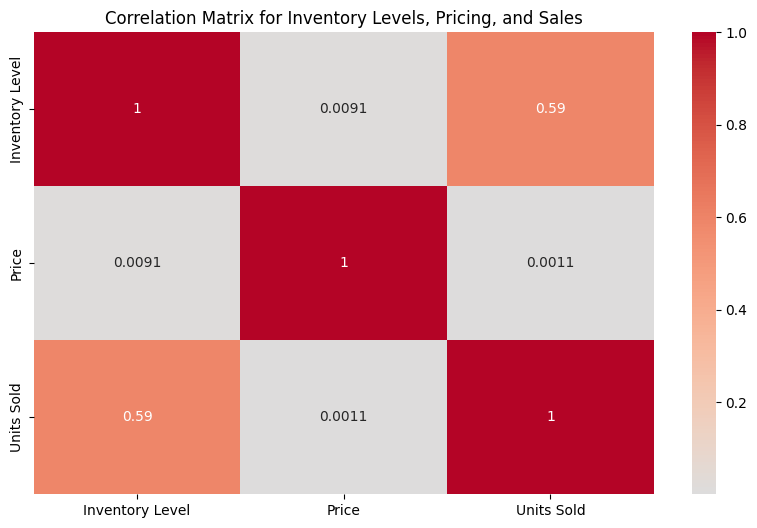

In [22]:
# Select the relevant columns for correlation
corr_data = dataset[['Inventory Level', 'Price', 'Units Sold']]

# Compute the correlation matrix
corr_matrix = corr_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Inventory Levels, Pricing, and Sales')
plt.show()

> Units Sold and Price has positive correlations with Inventory Level, but Inventory Level has a stronger correlation with it then Price.

##### What is the impact of discounts on sales?
(Determines the effectiveness of discounting as a pricing strategy.)

In [23]:
dataset['Discount'].nunique()

5

In [24]:
# Group by 'Discount' and calculate the average units sold
discount_impact = dataset.groupby('Discount')['Units Sold'].mean().reset_index()

In [25]:
discount_impact.head()

Discount  Units Sold
0         0  135.694585
1         5  136.567405
2        10  136.769851
3        15  136.655293
4        20  136.640775

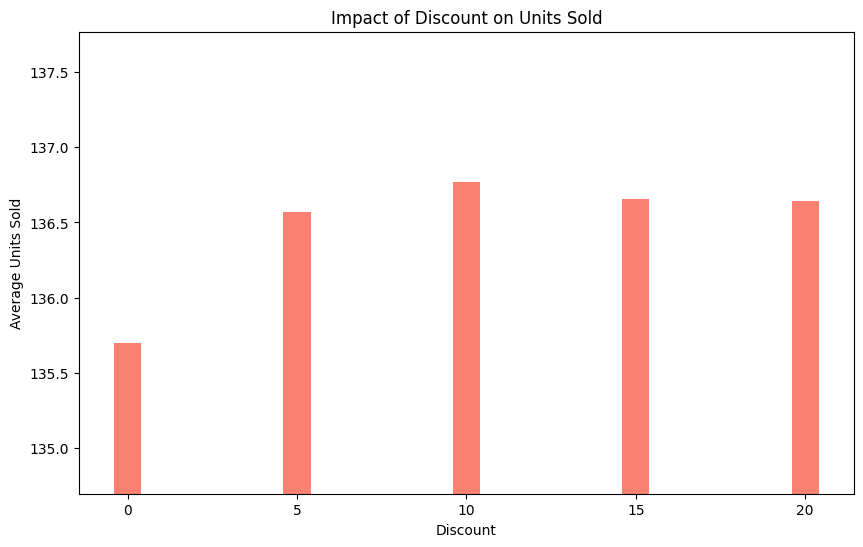

In [26]:
# Finding the range of the data for better axis limits
min_avg_unit_sold, max_avg_unit_sold = discount_impact['Units Sold'].min(), discount_impact['Units Sold'].max()

# Plotting
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axes
ax.bar(discount_impact['Discount'], discount_impact['Units Sold'], color='salmon')
ax.set_xlabel('Discount')
ax.set_ylabel('Average Units Sold')
ax.set_title('Impact of Discount on Units Sold')
ax.set_xticks(discount_impact['Discount'])
ax.set_ylim(min_avg_unit_sold - 1, max_avg_unit_sold + 1)  # Adjust y-axis limits
plt.show()


> Zero Discount has the lowest impact on Units Sold!  
> The other Discount groups have almost the same (amount of) impact on the Units Sold!

##### How do weather conditions affect sales and pricing?
(External factors like weather can significantly influence demand.)

In [27]:
# Group by 'Weather Condition' and calculate the average units sold and average price
weather_sales = dataset.groupby('Weather Condition')['Units Sold'].mean().reset_index()
weather_prices = dataset.groupby('Weather Condition')['Price'].mean().reset_index()

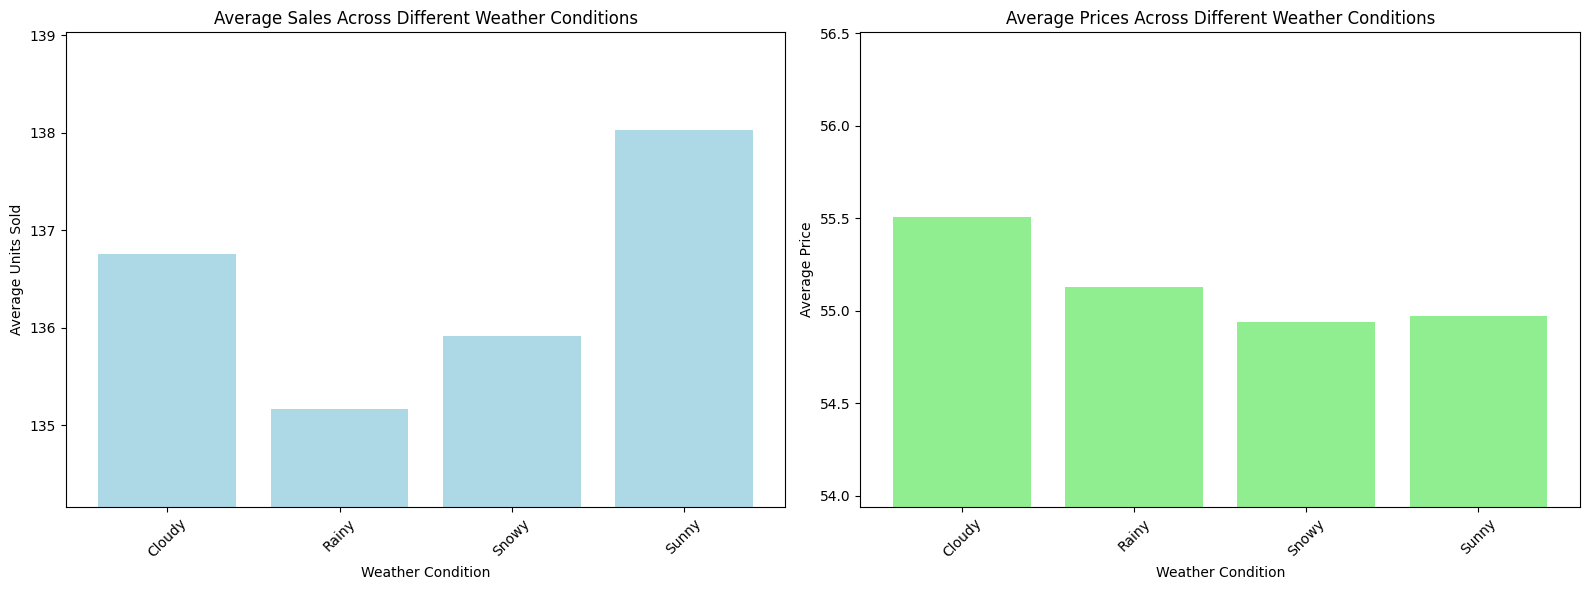

In [28]:
min_avg_price, max_avg_price = weather_prices['Price'].min(), weather_prices['Price'].max()
min_avg_sales, max_avg_sales = weather_sales['Units Sold'].min(), weather_sales['Units Sold'].max()

# Plotting
fig, ax1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot for weather conditions and sales
ax1[0].bar(weather_sales['Weather Condition'], weather_sales['Units Sold'], color='lightblue')
ax1[0].set_xlabel('Weather Condition')
ax1[0].set_ylabel('Average Units Sold')
ax1[0].set_title('Average Sales Across Different Weather Conditions')
ax1[0].tick_params(axis='x', rotation=45)
ax1[0].set_ylim(min_avg_sales - 1, max_avg_sales + 1)

# Plot for weather conditions and prices
ax1[1].bar(weather_prices['Weather Condition'], weather_prices['Price'], color='lightgreen')
ax1[1].set_xlabel('Weather Condition')
ax1[1].set_ylabel('Average Price')
ax1[1].set_title('Average Prices Across Different Weather Conditions')
ax1[1].tick_params(axis='x', rotation=45)
ax1[1].set_ylim(min_avg_price - 1, max_avg_price + 1)

plt.tight_layout()
plt.show()

> Prices are higher when weather condition is Cloudy! The prices are almost equals when the weather conditions are Rainy, Snowy or Sunny!   
> Average Sales are higher when the weather condition is Sunny! The next weather condition with higher average unit sales is Cloudy, then Snowy and finally Rainy has the lowest average Units Sold!

##### What is the effect of holidays or promotions on sales?
(Identifies periods where promotional pricing might be most effective.)

In [29]:
# Group by 'Holiday/Promotion' and calculate the average units sold
promotion_effect = dataset.groupby('Holiday/Promotion')['Units Sold'].mean().reset_index()

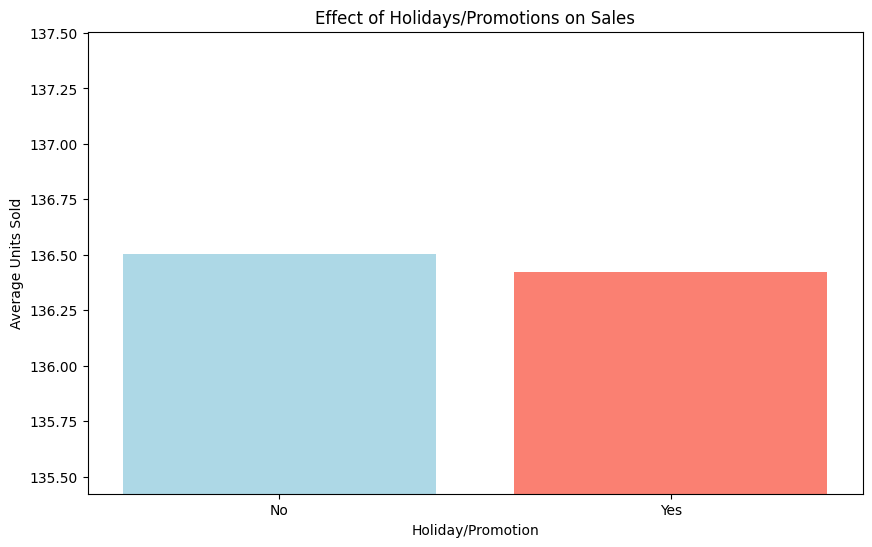

In [30]:
# Finding the range of the data for better axis limits
min_avg_unit_sold_hp, max_avg_unit_sold_hp = promotion_effect['Units Sold'].min(), promotion_effect['Units Sold'].max()

# Plotting
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.bar(promotion_effect['Holiday/Promotion'].astype(str), promotion_effect['Units Sold'], color=['lightblue', 'salmon'])
ax.set_xlabel('Holiday/Promotion')
ax.set_ylabel('Average Units Sold')
ax.set_title('Effect of Holidays/Promotions on Sales')
ax.set_xticks([0, 1], ['No', 'Yes'])
ax.set_ylim(min_avg_unit_sold_hp - 1, max_avg_unit_sold_hp + 1)
plt.show()

> There is little effect of Holidays/Promotions on sales.  
> Promotional pricing doesn't seem to be effective.

##### How do competitor prices influence our sales and pricing?
(Understands the competitive landscape and pricing positioning.)

In [31]:
# Calculate the correlation matrix for 'Competitor Pricing', 'Units Sold', and 'Price'
corr_data = dataset[['Competitor Pricing', 'Units Sold', 'Price']]
corr_matrix_comp_price = corr_data.corr()

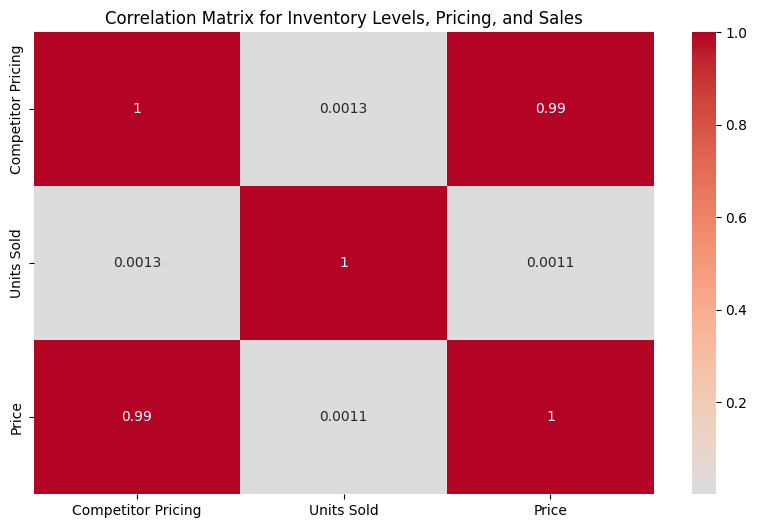

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_comp_price, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Inventory Levels, Pricing, and Sales')
plt.show()

> A correlation of 0.99 between 'Competitor Pricing' and 'Price' suggests an extremely strong positive relationship. This means that as competitor prices change, our prices tend to change in almost the same manner.  
This is an important insight, as it shows our pricing strategy is highly influenced by competitor prices.  

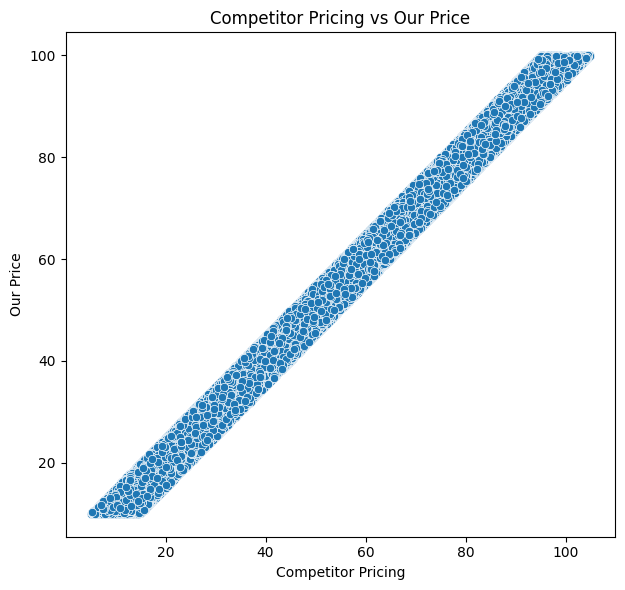

In [33]:
# Scatterplot for Competitor Pricing vs Our Price
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Competitor Pricing', y='Price', data=dataset)
plt.xlabel('Competitor Pricing')
plt.ylabel('Our Price')
plt.title('Competitor Pricing vs Our Price')

plt.tight_layout()
plt.show()

##### How does the demand forecast compare with actual sales?
(Evaluates the accuracy of demand forecasting methods.)

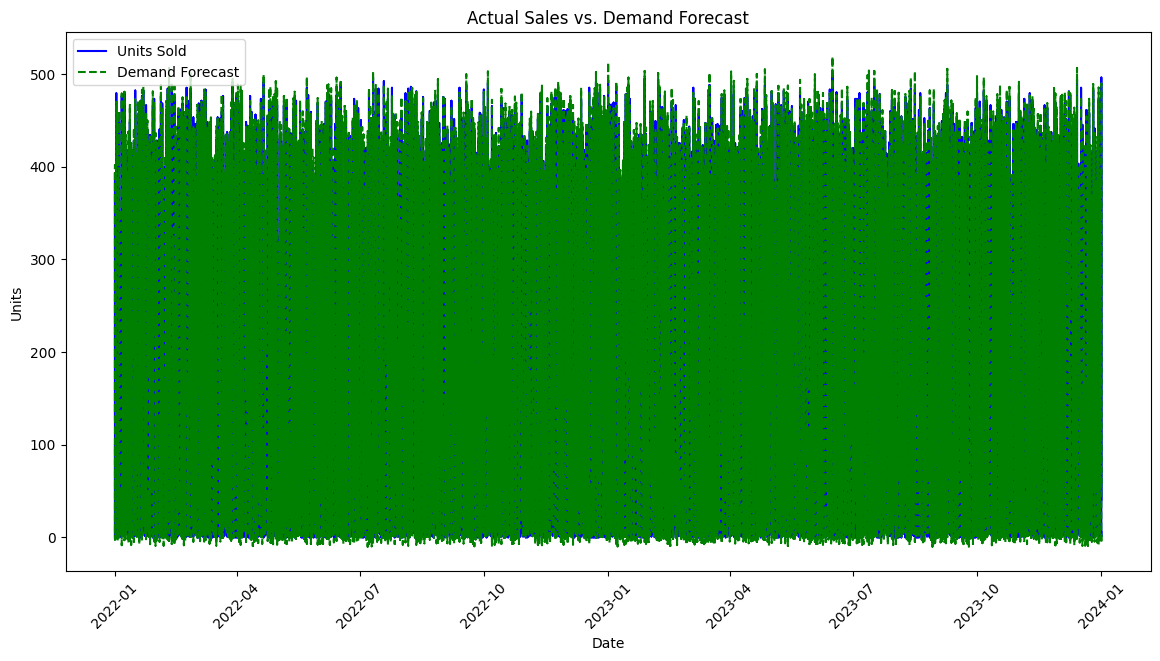

In [34]:
# Plot the actual sales vs demand forecast
plt.figure(figsize=(14, 7))
plt.plot(dataset['Date'], dataset['Units Sold'], label='Units Sold', color='blue')
plt.plot(dataset['Date'], dataset['Demand Forecast'], label='Demand Forecast', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Units')
plt.title('Actual Sales vs. Demand Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [35]:
# Grouping by category and calculating the average for 'Units Sold' and 'Demand Forecast'
category_grouped = dataset.groupby('Category')[['Units Sold', 'Demand Forecast']].mean().reset_index()

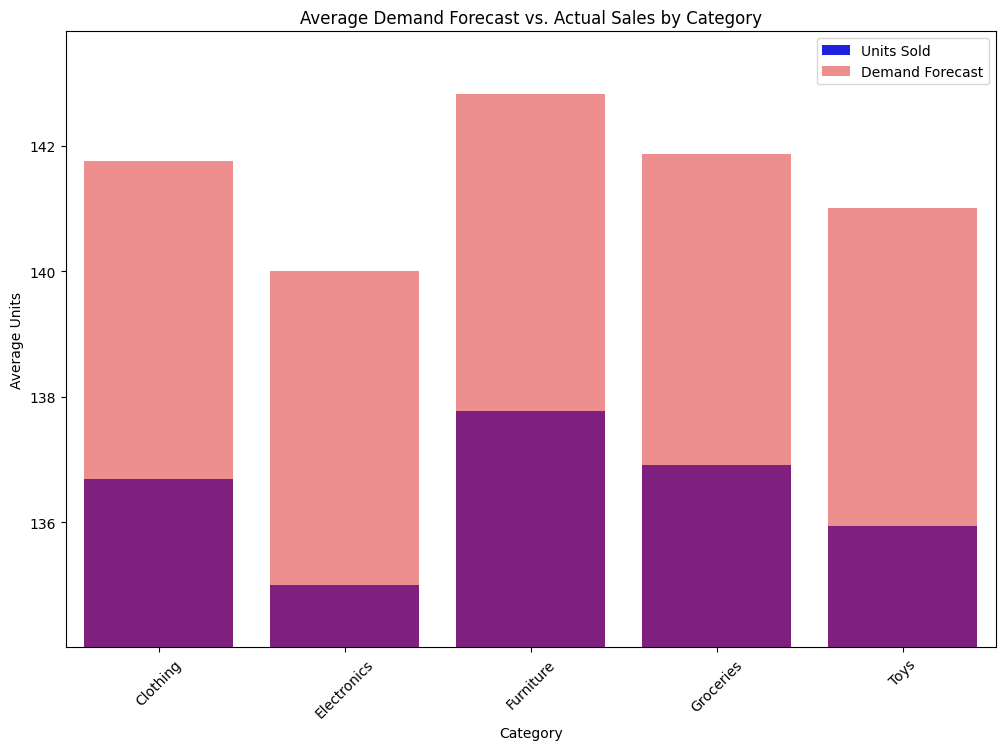

In [36]:
min_avg_un_sol, max_avg_un_sol = category_grouped['Units Sold'].min(), category_grouped['Units Sold'].max()
min_avg_demand, max_avg_demand = category_grouped['Demand Forecast'].min(), category_grouped['Demand Forecast'].max()

# Plotting the comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Units Sold', data=category_grouped, color='blue', alpha=1, label='Units Sold')
sns.barplot(x='Category', y='Demand Forecast', data=category_grouped, color='red', alpha=0.5, label='Demand Forecast')
plt.xlabel('Category')
plt.ylabel('Average Units')
plt.title('Average Demand Forecast vs. Actual Sales by Category')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(min(min_avg_un_sol, min_avg_demand) - 1, max(max_avg_un_sol, max_avg_demand) + 1)
plt.show()

> No Product Category has sold as average demand forecast expected. 

##### Which products have the highest revenue?
(Focuses on products that contribute most to revenue.)

In [37]:
# Calculate revenue for each row
dataset['Revenue'] = dataset['Units Sold'] * dataset['Price']

In [38]:
# Group by Product ID and calculate the total revenue and units sold
product_grouped = dataset.groupby('Product ID').agg({
    'Revenue': 'sum',
    'Units Sold': 'sum',
    'Price': 'mean'
}).reset_index()


In [39]:
# Sort products by Revenue in descending order
top_products = product_grouped.sort_values(by='Revenue', ascending=False)

# Display top products
top_products.head()

Product ID      Revenue  Units Sold      Price
19      P0020  28306192.40      507708  55.524030
10      P0011  28155025.56      499362  56.433294
15      P0016  28153328.38      508472  54.832030
13      P0014  28110375.77      507622  55.761581
4       P0005  27916663.02      503648  55.023590

##### Which categories have the highest revenue?
(Focuses on categories that contribute most to revenue.)

In [40]:
# Group by Category and calculate the total revenue and units sold
category_grouped = dataset.groupby('Category').agg({
    'Revenue': 'sum',
    'Units Sold': 'sum',
    'Price': 'mean'
}).reset_index()

# Sort categories by Revenue in descending order
top_categories = category_grouped.sort_values(by='Revenue', ascending=False)

# Display top categories
top_categories.head()

Category       Revenue  Units Sold      Price
2    Furniture  1.115118e+08     2025017  55.175861
3    Groceries  1.109845e+08     2000482  55.271222
0     Clothing  1.096510e+08     1999166  54.886602
4         Toys  1.096424e+08     1990485  55.032410
1  Electronics  1.084391e+08     1960432  55.310763

##### What pricing patterns emerge from high-performing Product Categories?

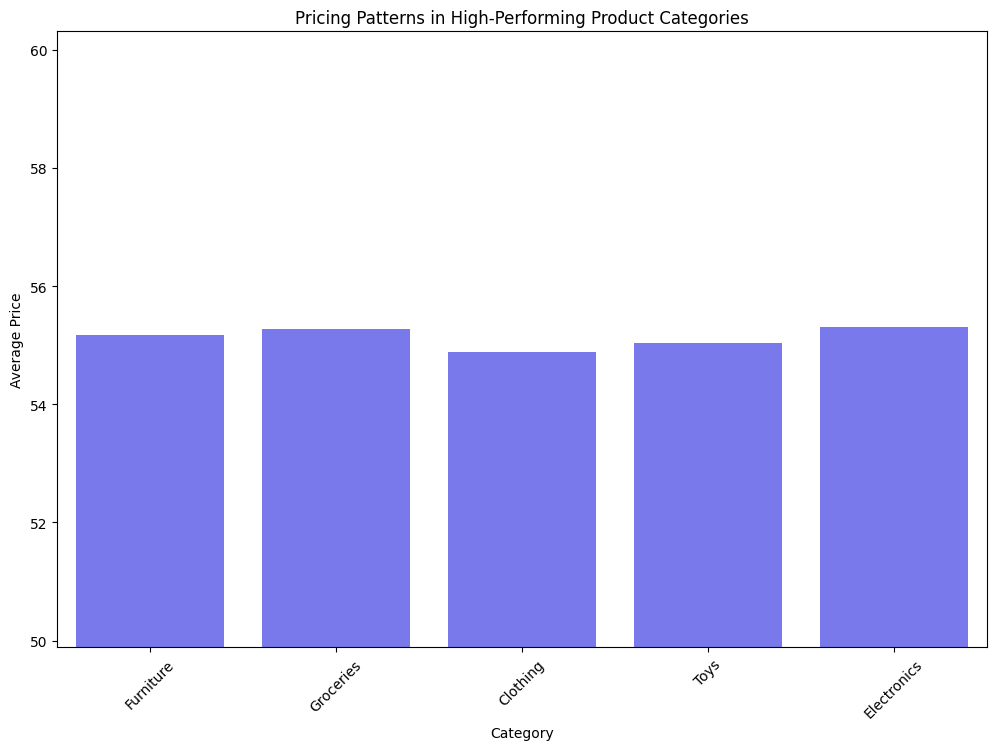

      Category       Revenue  Units Sold      Price
2    Furniture  1.115118e+08     2025017  55.175861
3    Groceries  1.109845e+08     2000482  55.271222
0     Clothing  1.096510e+08     1999166  54.886602
4         Toys  1.096424e+08     1990485  55.032410
1  Electronics  1.084391e+08     1960432  55.310763


In [41]:
# Define high-performing categories based on revenue
# For this example, let's use total revenue
top_categories = category_grouped.sort_values(by='Revenue', ascending=False).head(5)

# Plot pricing patterns in high-performing categories
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Price', data=top_categories, color='blue', alpha=0.6)
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Pricing Patterns in High-Performing Product Categories')
plt.xticks(rotation=45)
plt.ylim(top_categories['Price'].min() - 5, top_categories['Price'].max() + 5)
plt.show()

# Display the grouped data for high-performing categories
print(top_categories)

> Balanced Demand: Each of these categories is likely to have a consistent and balanced demand, indicating that customers value these categories similarly.  
Effective Pricing Strategy: The pricing strategy for these categories might be optimized, ensuring that the prices are set at levels that maximize both sales volume and revenue. If the prices are close, it suggests that the market's perceived value for these products is similar.  

##### How do different price points impact overall revenue?
(Identifies the optimal price points for maximizing revenue.)

In [ ]:
# Create price bins 
price_bins = pd.cut(dataset['Price'], bins=8)  # 10 price bins

# Aggregate revenue by price bins
revenue_by_price_bin = dataset.groupby(price_bins)['Revenue'].sum().reset_index()

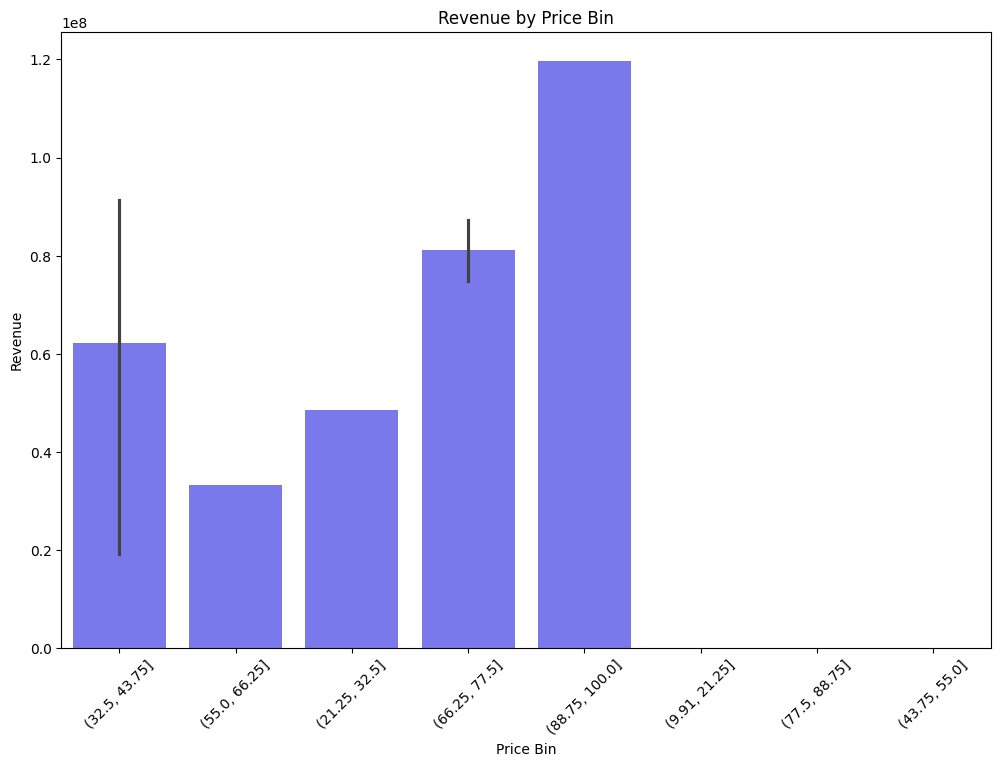

            Price       Revenue
0   (9.91, 21.25]  1.908331e+07
1   (21.25, 32.5]  3.330657e+07
2   (32.5, 43.75]  4.854911e+07
3   (43.75, 55.0]  6.189061e+07
4   (55.0, 66.25]  7.485271e+07
5   (66.25, 77.5]  8.729904e+07
6   (77.5, 88.75]  1.056119e+08
7  (88.75, 100.0]  1.196357e+08


In [43]:
# Plot the revenue by price bins
plt.figure(figsize=(12, 8))
sns.barplot(x=price_bins.astype(str), y='Revenue', data=revenue_by_price_bin, color='blue', alpha=0.6)
plt.xlabel('Price Bin')
plt.ylabel('Revenue')
plt.title('Revenue by Price Bin')
plt.xticks(rotation=45)
plt.show()

# Display the revenue by price bin
print(revenue_by_price_bin)

##### How is 'Units Ordered' correlated with other features such as 'Price,' 'Units Sold,' 'Revenue,' and 'Competitor Pricing'?

In [44]:
# Calculate the correlation matrix for 'Competitor Pricing', 'Units Sold', and 'Price'
corr_data_uo = dataset[['Units Ordered','Competitor Pricing', 'Units Sold', 'Price', 'Revenue']]
corr_matrix_comp_price_uo = corr_data_uo.corr()

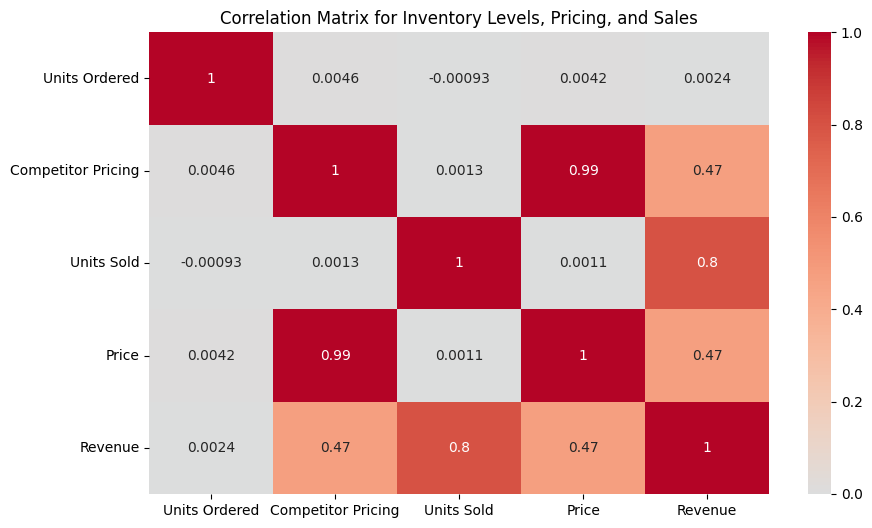

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_comp_price_uo, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Inventory Levels, Pricing, and Sales')
plt.show()

##### How does 'Units Ordered' vary across different seasons ('Seasonality') and weather conditions ('Weather Condition')?

In [46]:
# Group by Seasonality and Weather Condition
seasonality_weather_ordered = dataset.groupby(['Seasonality', 'Weather Condition'])['Units Ordered'].mean().reset_index()

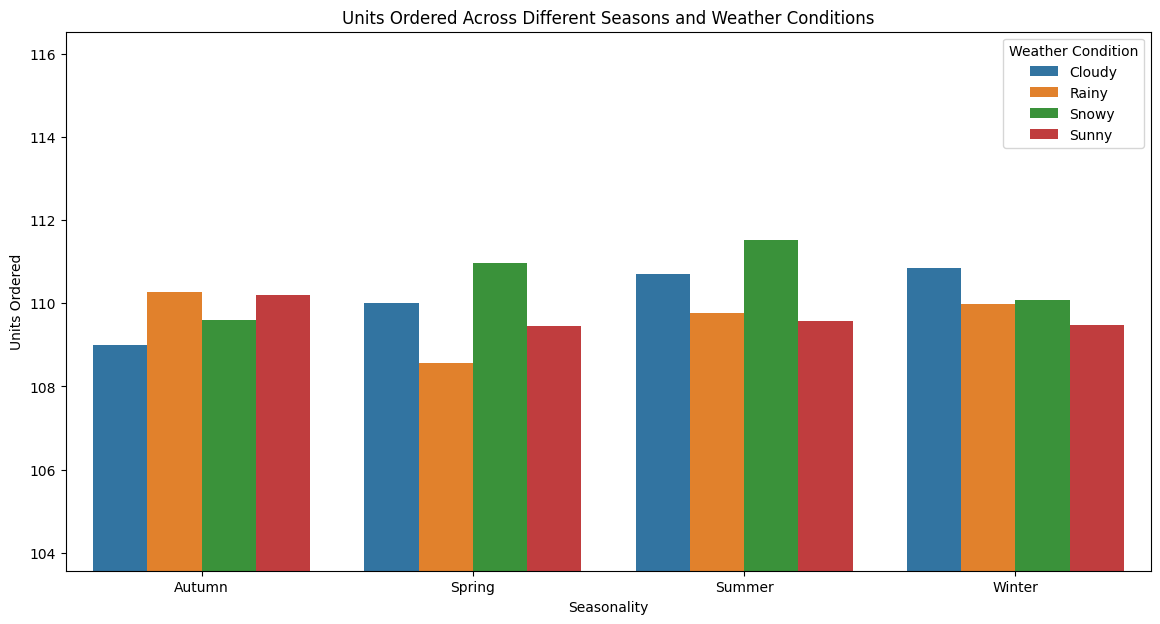

In [47]:
# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=seasonality_weather_ordered, x='Seasonality', y='Units Ordered', hue='Weather Condition')
plt.title('Units Ordered Across Different Seasons and Weather Conditions')
plt.ylim(seasonality_weather_ordered['Units Ordered'].min() - 5, seasonality_weather_ordered['Units Ordered'].max() + 5)
plt.show()

> The units ordered in general don't differ too much during seasons.  
During summer and spring seasons, it shows when weather is snowy the units ordered as highest, maybe some typo issue in the dataset or miss values (It can't be summer and snowy!)  

##### Impact of 'Discount' and 'Holiday/Promotion' on 'Units Ordered' and 'Units Sold'

In [48]:
# Group by Discount
discount_ordered_sold = dataset.groupby('Discount')[['Units Ordered', 'Units Sold']].mean().reset_index()

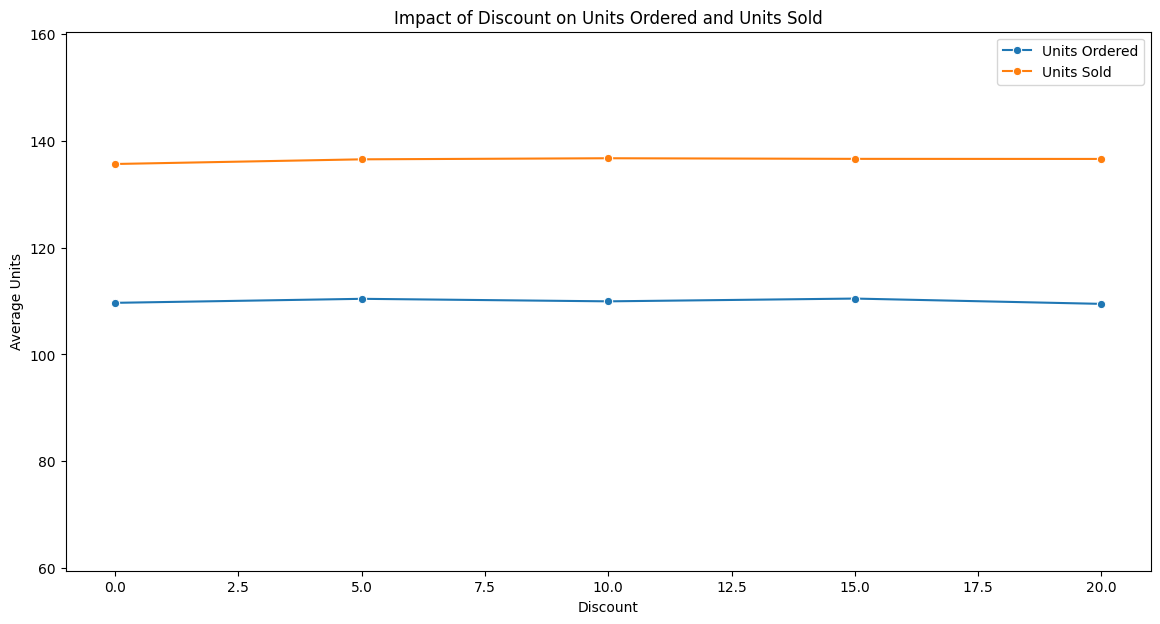

In [49]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=discount_ordered_sold, x='Discount', y='Units Ordered', marker='o', label='Units Ordered')
sns.lineplot(data=discount_ordered_sold, x='Discount', y='Units Sold', marker='o', label='Units Sold')
plt.title('Impact of Discount on Units Ordered and Units Sold')
plt.ylabel('Average Units')
plt.xlabel('Discount')
plt.ylim(discount_ordered_sold['Units Ordered'].min() - 50, discount_ordered_sold['Units Ordered'].max() + 50)  # Adjust these values based on your data range
plt.legend()
plt.show()


> The lack of variation in the relationship between 'Units Ordered' and 'Units Sold' across different discount categories and promotions suggests that these factors are not significantly affecting the gap between orders and sales.

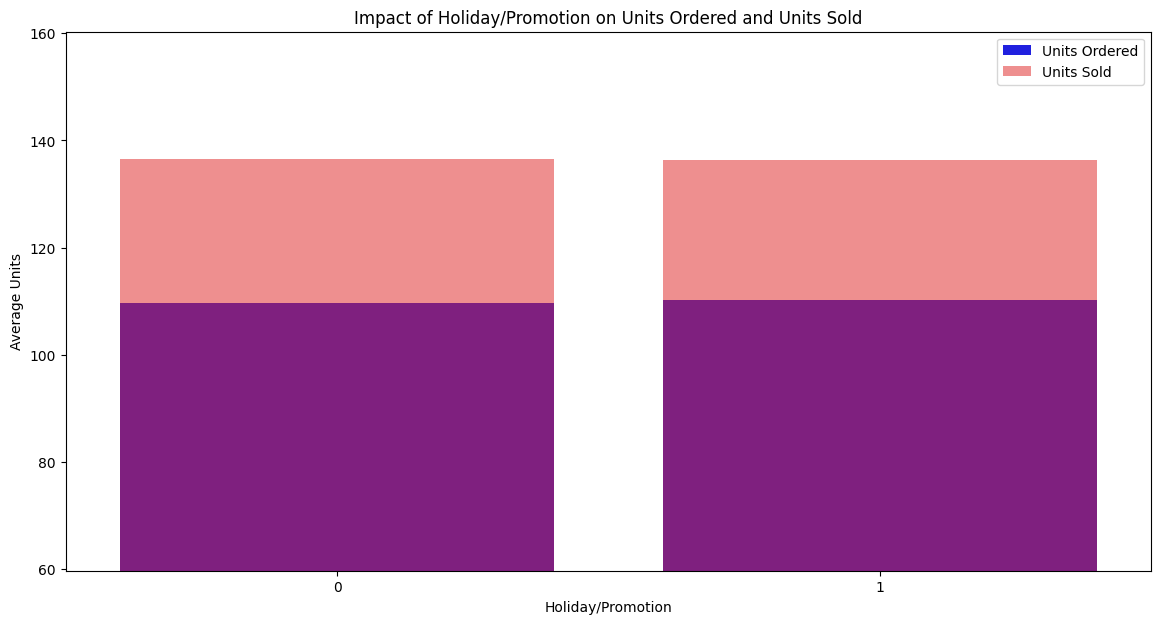

In [50]:
# Group by Holiday/Promotion
holiday_ordered_sold = dataset.groupby('Holiday/Promotion')[['Units Ordered', 'Units Sold']].mean().reset_index()

# Plotting Holiday/Promotion impact
plt.figure(figsize=(14, 7))
sns.barplot(data=holiday_ordered_sold, x='Holiday/Promotion', y='Units Ordered', label='Units Ordered', color='b')
sns.barplot(data=holiday_ordered_sold, x='Holiday/Promotion', y='Units Sold', label='Units Sold', color='r', alpha=0.5)
plt.title('Impact of Holiday/Promotion on Units Ordered and Units Sold')
plt.ylabel('Average Units')
plt.xlabel('Holiday/Promotion')
plt.ylim(holiday_ordered_sold['Units Ordered'].min() - 50, holiday_ordered_sold['Units Ordered'].max() + 50)
plt.legend()
plt.show()

##### What are the effects of seasonality on competitor pricing?
(Understands how competitors adjust their pricing seasonally.)

In [51]:
# Group by Seasonality and calculate average competitor pricing
seasonality_grouped = dataset.groupby('Seasonality')['Competitor Pricing'].mean().reset_index()

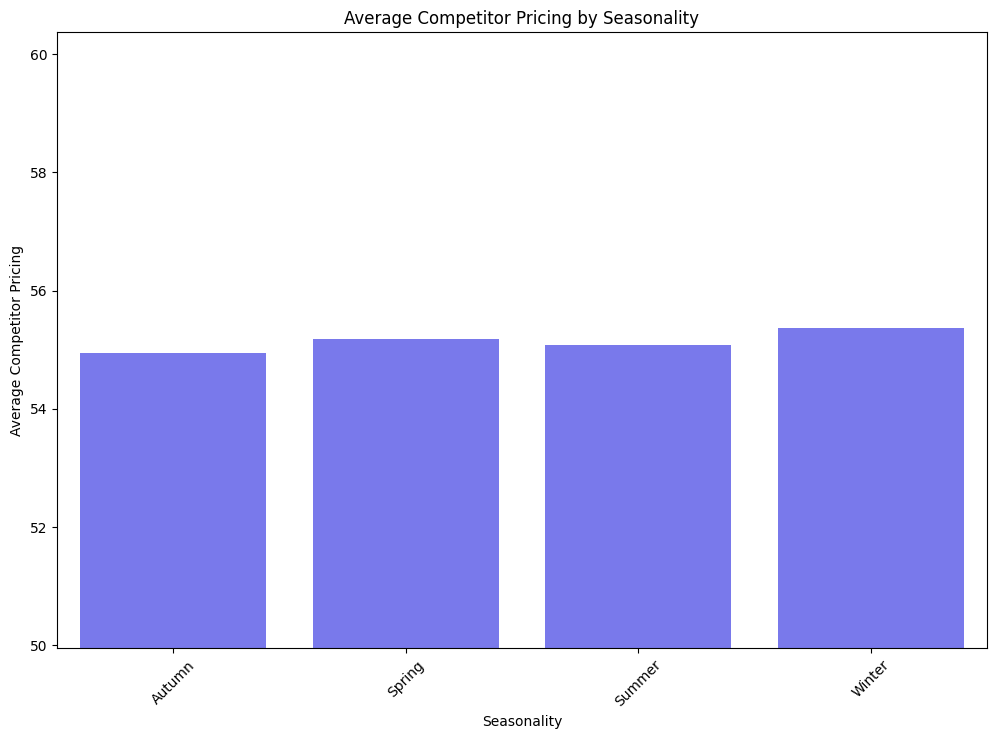

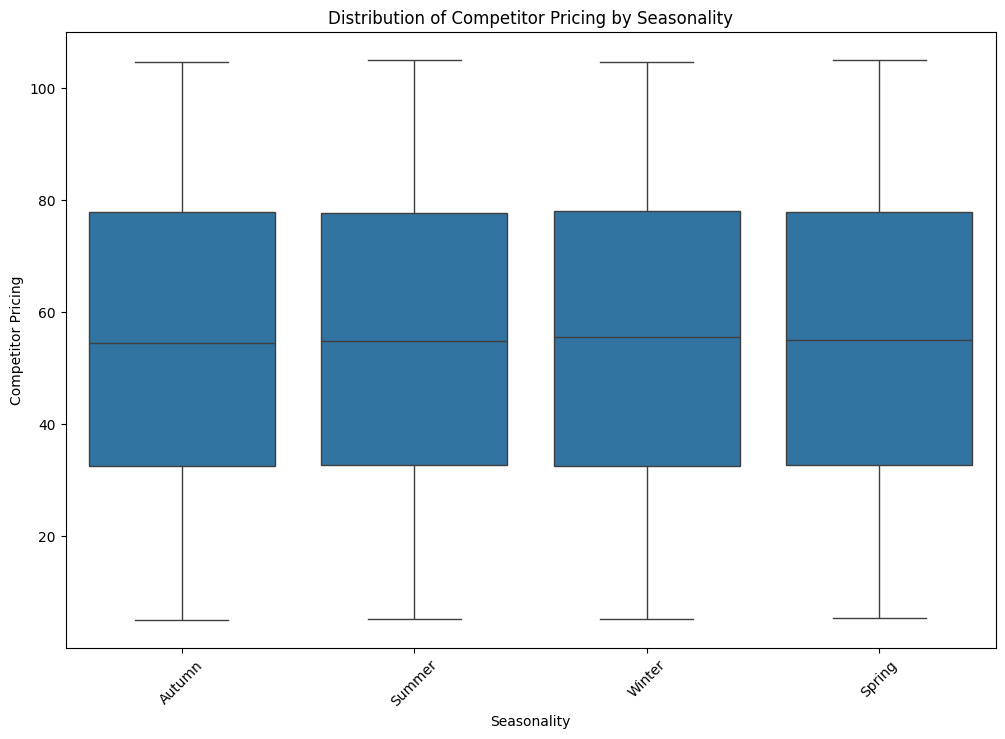

In [52]:
# Plot the average competitor pricing by seasonality
plt.figure(figsize=(12, 8))
sns.barplot(x='Seasonality', y='Competitor Pricing', data=seasonality_grouped, color='blue', alpha=0.6)
plt.xlabel('Seasonality')
plt.ylabel('Average Competitor Pricing')
plt.title('Average Competitor Pricing by Seasonality')
plt.xticks(rotation=45)
# Adjusting the y-axis limits
plt.ylim(seasonality_grouped['Competitor Pricing'].min() - 5, seasonality_grouped['Competitor Pricing'].max() + 5)

plt.show()

# Alternatively, create a box plot to show the distribution of competitor pricing by seasonality
plt.figure(figsize=(12, 8))
sns.boxplot(x='Seasonality', y='Competitor Pricing', data=dataset)
plt.xlabel('Seasonality')
plt.ylabel('Competitor Pricing')
plt.title('Distribution of Competitor Pricing by Seasonality')
plt.xticks(rotation=45)
# Adjusting the y-axis limits
plt.ylim(dataset['Competitor Pricing'].min() - 5, dataset['Competitor Pricing'].max() + 5)

plt.show()

> Average competitor pricing is almost identical through a year, (identical in different seasons)!

##### How does Competitor Pricing correlate with sales performance (Units Sold) and revenue?

In [53]:
corr_comp_sale_revenue = dataset[['Competitor Pricing', 'Units Sold', 'Revenue']].corr()

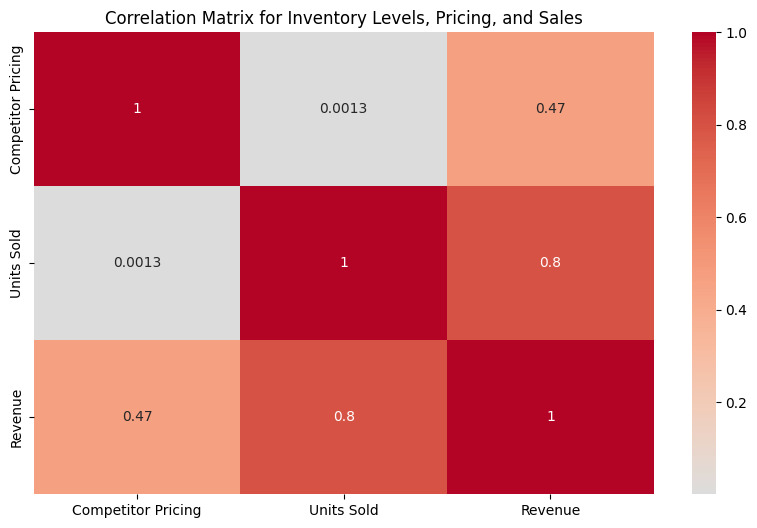

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_comp_sale_revenue, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Inventory Levels, Pricing, and Sales')
plt.show()

> Competitor Pricing has a positive correlation with Revenue (0.47)! Competitor Pricing has a very weak positive correlation with Units Sold!  
> Units Sold has a strong positive correlation with Revenue!

##### What is the impact of Discounts on sales, revenue, and inventory levels?

In [55]:
# Group by Discount and calculate the average for Units Sold, Revenue, and Inventory Level
discount_grouped = dataset.groupby('Discount').agg({
    'Units Sold': 'mean',
    'Revenue': 'mean',
    'Inventory Level': 'mean'
}).reset_index()

In [56]:
discount_grouped.head()

Discount  Units Sold      Revenue  Inventory Level
0         0  135.694585  7465.530608       272.759173
1         5  136.567405  7550.055408       275.857789
2        10  136.769851  7483.168819       273.532396
3        15  136.655293  7542.854176       274.536994
4        20  136.640775  7593.197688       275.655793

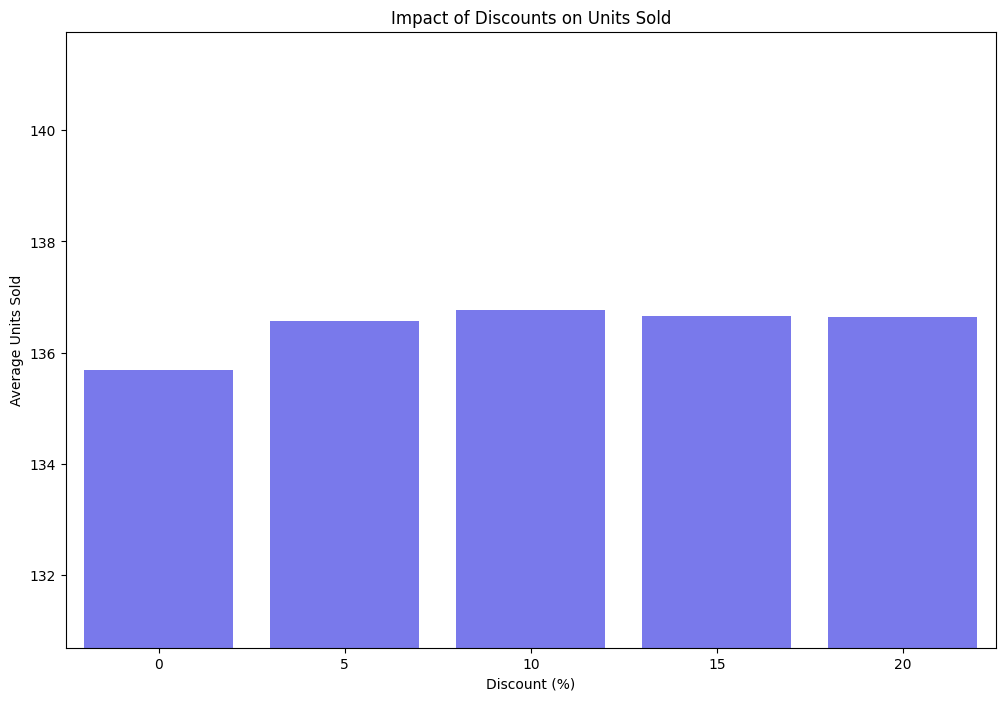

In [57]:
# Plot the impact of Discounts on Units Sold
plt.figure(figsize=(12, 8))
sns.barplot(x='Discount', y='Units Sold', data=discount_grouped, color='blue', alpha=0.6)
plt.xlabel('Discount (%)')
plt.ylabel('Average Units Sold')
plt.title('Impact of Discounts on Units Sold')
plt.ylim(discount_grouped['Units Sold'].min() - 5, discount_grouped['Units Sold'].max() + 5)
plt.show()

> Average Units Sold for 0 Discount group is lowest between all other groups! The other ones have almost identical average units sold!

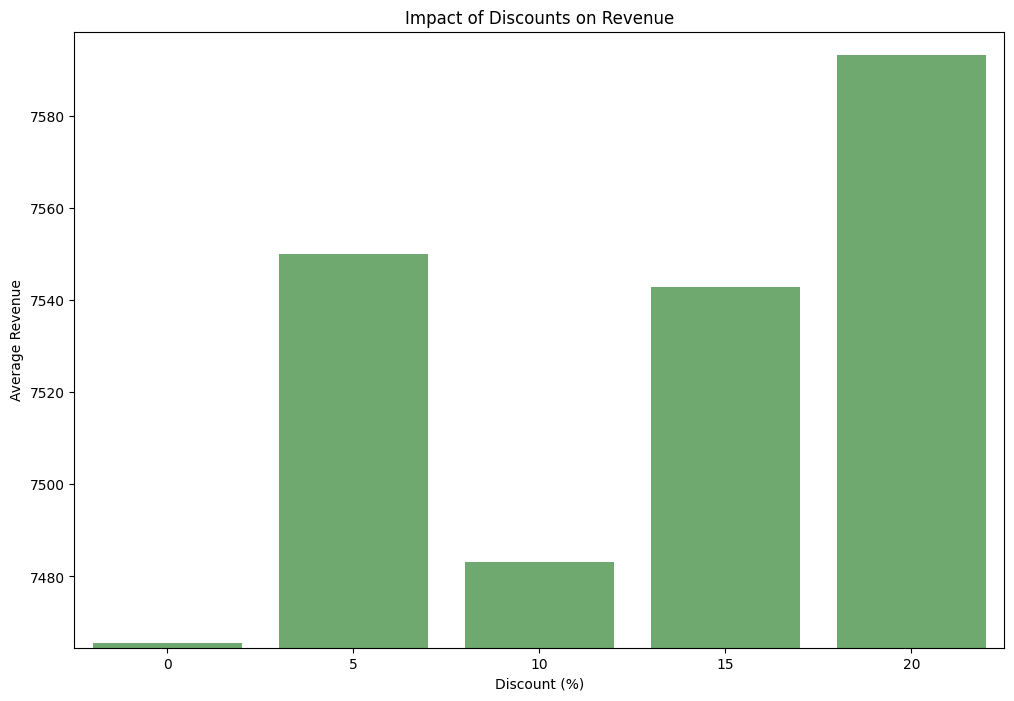

In [58]:
# Plot the impact of Discounts on Revenue
plt.figure(figsize=(12, 8))
sns.barplot(x='Discount', y='Revenue', data=discount_grouped, color='green', alpha=0.6)
plt.xlabel('Discount (%)')
plt.ylabel('Average Revenue')
plt.title('Impact of Discounts on Revenue')
plt.ylim(discount_grouped['Revenue'].min() - 1, discount_grouped['Revenue'].max() + 5)
plt.show()

> The 0% Discount has the lowest impact on Revenue!  
The 10% discount group has second lowest impact on Revenue!   
The 5% discount group has more impact than 15% discount group on Revenue!  
The 20% discount group has the highest impact on the Revenue!

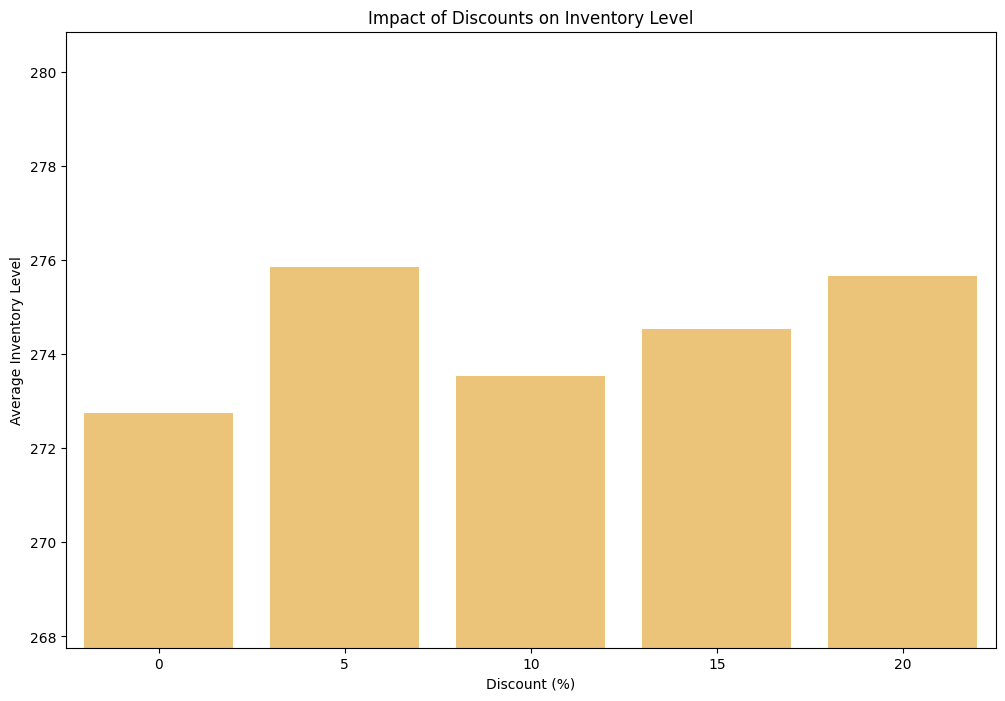

In [59]:
# Plot the impact of Discounts on Inventory Level
plt.figure(figsize=(12, 8))
sns.barplot(x='Discount', y='Inventory Level', data=discount_grouped, color='orange', alpha=0.6)
plt.xlabel('Discount (%)')
plt.ylabel('Average Inventory Level')
plt.title('Impact of Discounts on Inventory Level')
plt.ylim(discount_grouped['Inventory Level'].min() - 5, discount_grouped['Inventory Level'].max() + 5)
plt.show()

##### Are there identifiable seasonal trends in sales based on Seasonality and Date?

In [60]:
# Group by Seasonality and calculate total units sold
seasonality_sales = dataset.groupby('Seasonality')['Units Sold'].sum().reset_index()

# Group by Month and calculate total units sold
monthly_sales = dataset.groupby('Month')['Units Sold'].sum().reset_index()

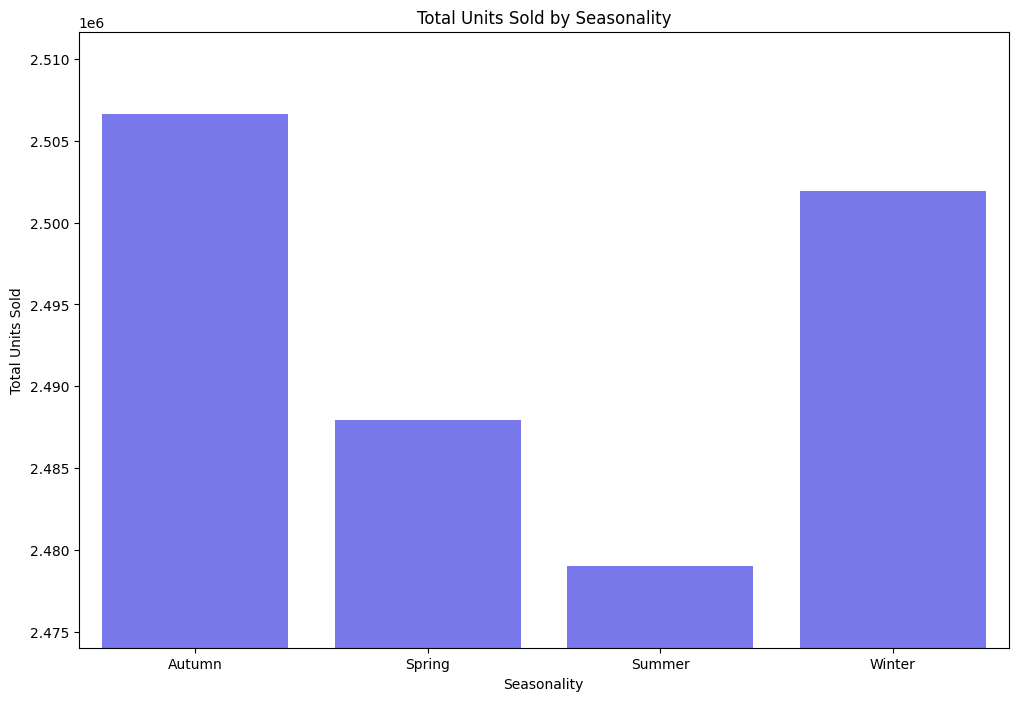

In [61]:
# Plot seasonal trends in sales
plt.figure(figsize=(12, 8))
sns.barplot(x='Seasonality', y='Units Sold', data=seasonality_sales, color='blue', alpha=0.6)
plt.xlabel('Seasonality')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Seasonality')
plt.ylim(seasonality_sales['Units Sold'].min() - 5000, seasonality_sales['Units Sold'].max() + 5000)
plt.show()

> Units sold are highest during Autumn and Winter, it drastically goes down during Spring and Summer!  
It’s clear that there’s a significant increase in sales during Autumn and Winter. This could be due to various factors like holidays (e.g., Christmas, Thanksgiving), colder weather driving demand for certain products, or promotional campaigns typically run during these periods.

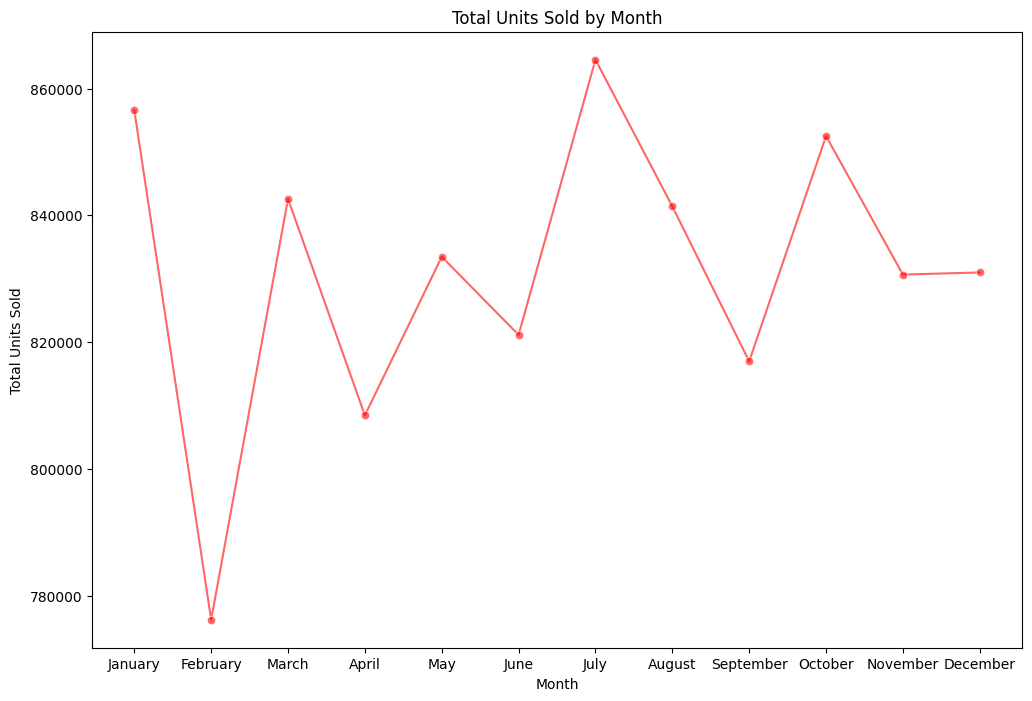

In [62]:
# Plot monthly sales trends
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Units Sold', data=monthly_sales, marker='o', color='red', alpha=0.6)
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Month')
plt.xticks(ticks=range(1, 13), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

> It varies alot during a year. The monthly data shows variability, suggesting that while certain months like January and March see higher sales, other months like February experience a dip. This could be due to several reasons, including post-holiday spending slumps in February or specific marketing activities in other months.

##### Which Regions have the highest demand or revenue, and how does pricing vary across them?

In [63]:
# Grouping by Region
region_grouped = dataset.groupby('Region').agg({
    'Units Sold': 'sum',
    'Demand Forecast': 'sum',
    'Revenue': 'sum',
    'Price': 'mean'
}).reset_index()

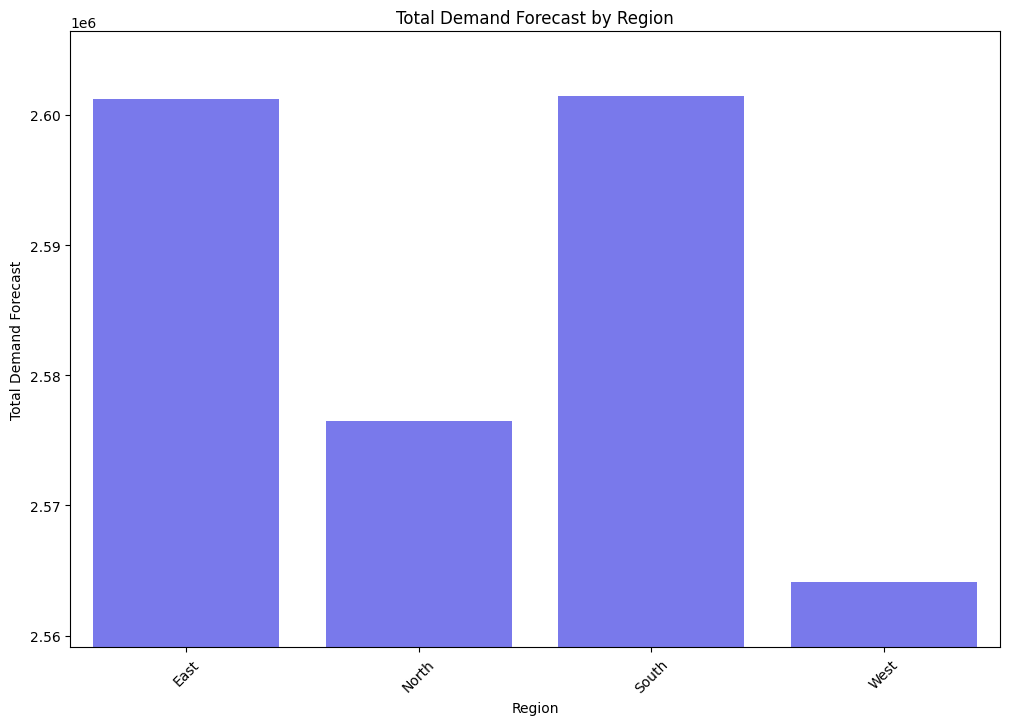

In [64]:
# Plotting total demand by region
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Demand Forecast', data=region_grouped, color='blue', alpha=0.6)
plt.xlabel('Region')
plt.ylabel('Total Demand Forecast')
plt.title('Total Demand Forecast by Region')
plt.xticks(rotation=45)
plt.ylim(region_grouped['Demand Forecast'].min() - 5000, region_grouped['Demand Forecast'].max() + 5000)
plt.show()

> Demand Forecast are highest and almost identical in East and South regions! It is lowest in West and the second lowest demand forecast is in North!

In [65]:
region_grouped['Revenue'].min()

135777996.39

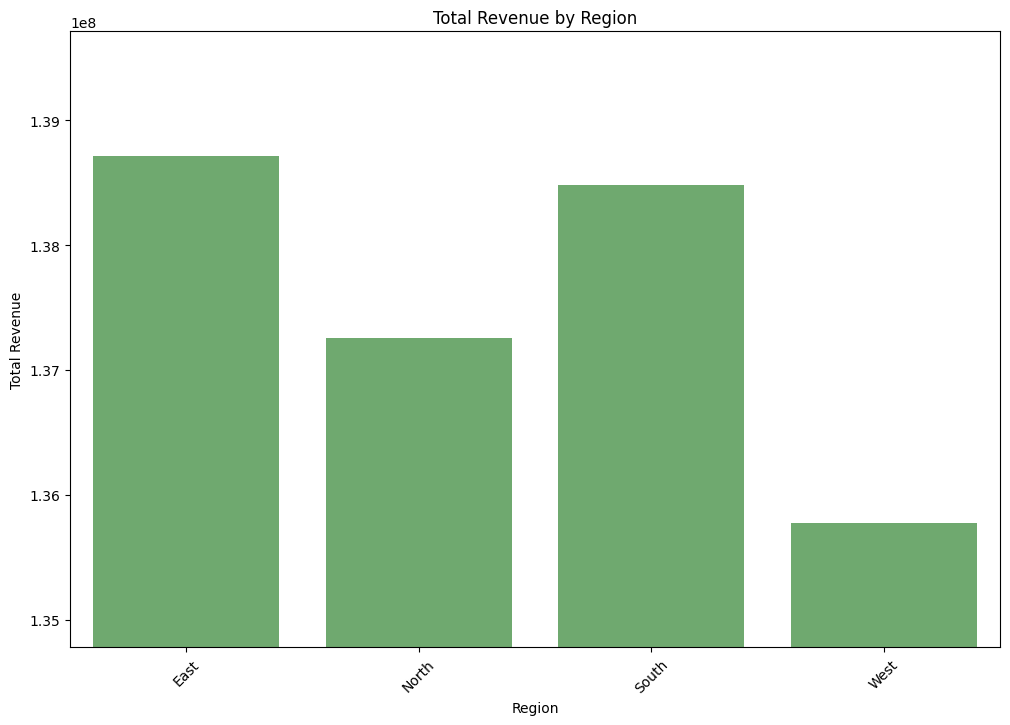

In [66]:
# Plotting total revenue by region
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Revenue', data=region_grouped, color='green', alpha=0.6)
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)
plt.ylim(region_grouped['Revenue'].min() - 1000000, region_grouped['Revenue'].max() + 1000000)
plt.show()

> Total Revenue is highest in East, then with a small margin is South, then is North and the lowest is West!

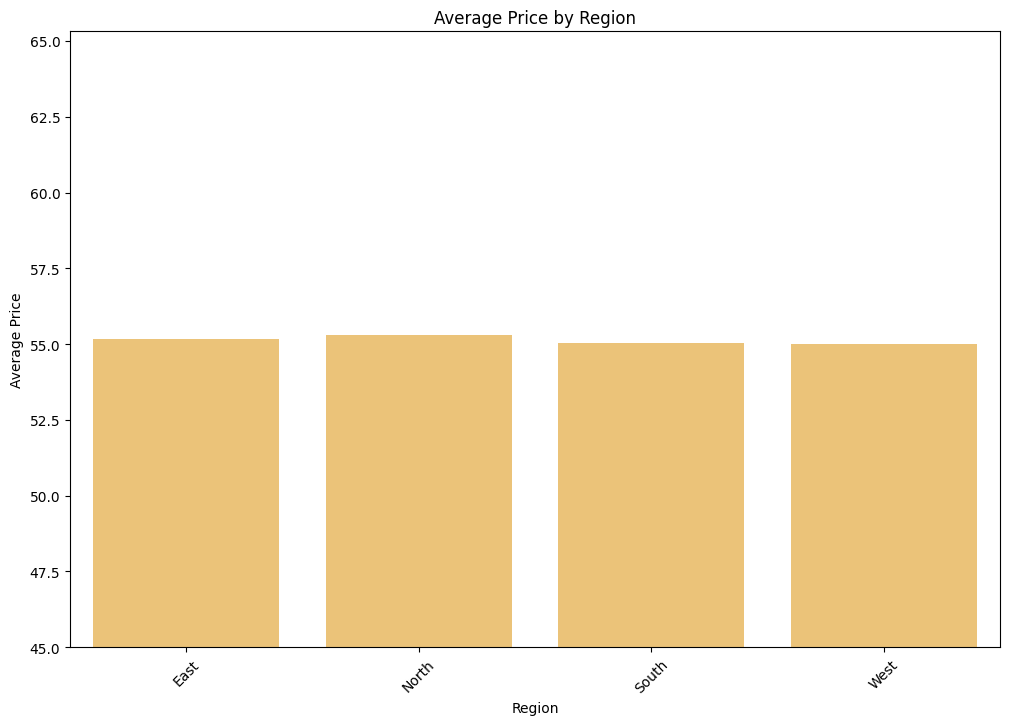

In [67]:
# Plotting average price by region
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Price', data=region_grouped, color='orange', alpha=0.6)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price by Region')
plt.xticks(rotation=45)
plt.ylim(region_grouped['Price'].min() - 10, region_grouped['Price'].max() + 10)
plt.show()

> Average prices are identical in all the regions!

##### Are there significant relationships between Inventory Level, pricing, and sales outcomes?

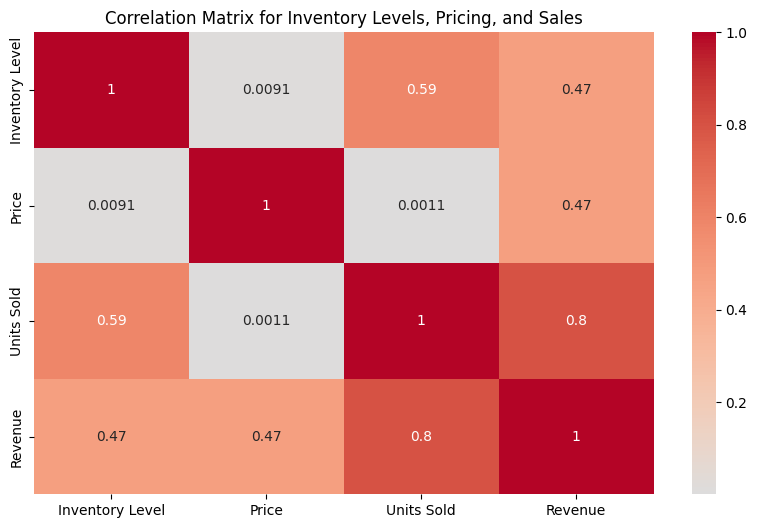

In [68]:
# Correlation analysis
sig_correlation_matrix = dataset[['Inventory Level', 'Price', 'Units Sold', 'Revenue']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(sig_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Inventory Levels, Pricing, and Sales')
plt.show()

> Units Sold has strong positive correlation with Revenue (0.8)!  
Price has positive correlation with Revenue (0.47)!  
Inventory Level has positive correlation with Revenue (0.47)!  
Inventory Level has positive correlation with Units Sold (0.59)!  

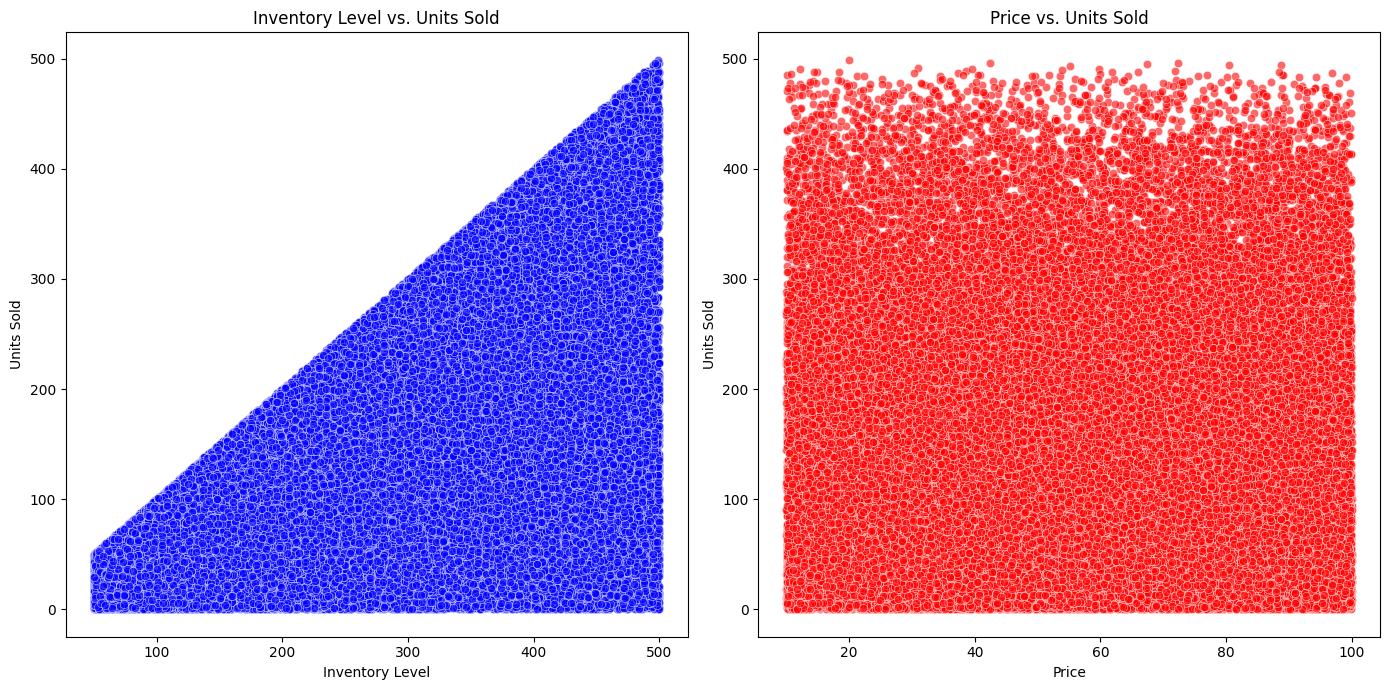

In [69]:
# Scatter plots to visualize relationships
plt.figure(figsize=(14, 7))

# Inventory Level vs. Units Sold
plt.subplot(1, 2, 1)
sns.scatterplot(x='Inventory Level', y='Units Sold', data=dataset, color='blue', alpha=0.6)
plt.xlabel('Inventory Level')
plt.ylabel('Units Sold')
plt.title('Inventory Level vs. Units Sold')

# Price vs. Units Sold
plt.subplot(1, 2, 2)
sns.scatterplot(x='Price', y='Units Sold', data=dataset, color='red', alpha=0.6)
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.title('Price vs. Units Sold')

plt.tight_layout()
plt.show()

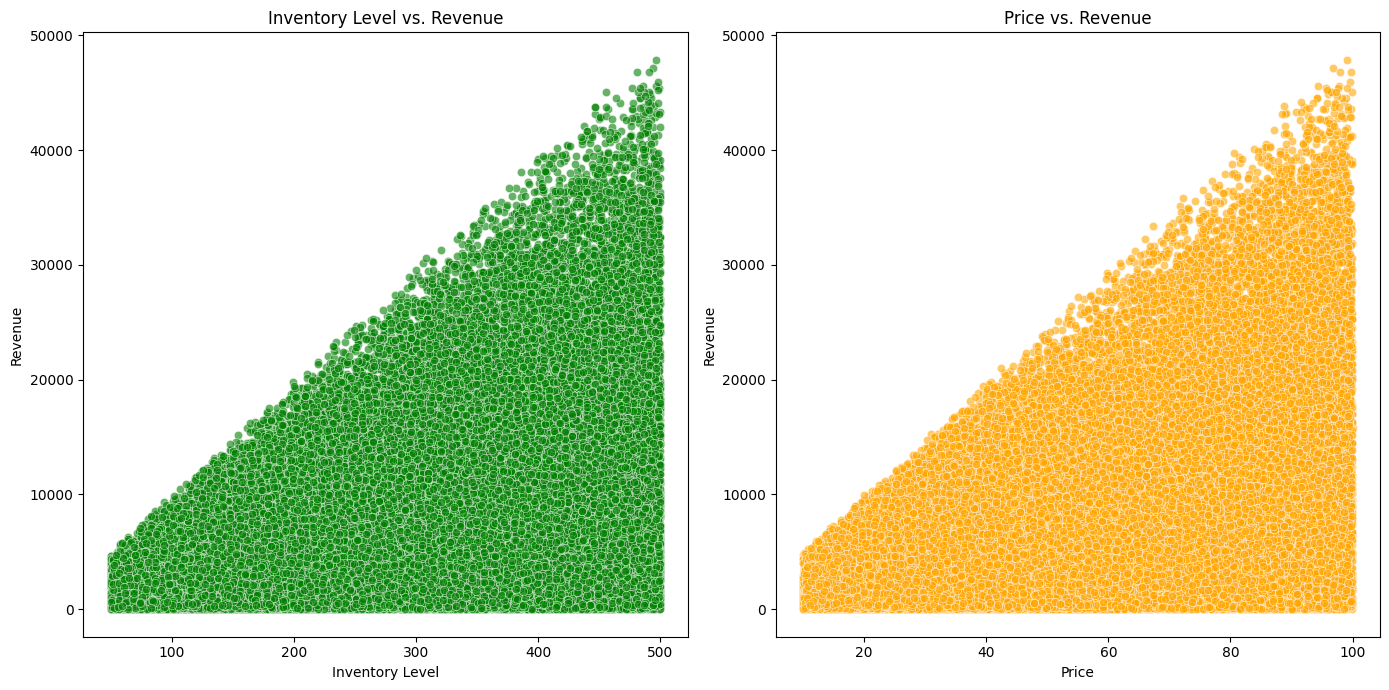

In [70]:
# Scatter plots to visualize relationships with Revenue
plt.figure(figsize=(14, 7))

# Inventory Level vs. Revenue
plt.subplot(1, 2, 1)
sns.scatterplot(x='Inventory Level', y='Revenue', data=dataset, color='green', alpha=0.6)
plt.xlabel('Inventory Level')
plt.ylabel('Revenue')
plt.title('Inventory Level vs. Revenue')

# Price vs. Revenue
plt.subplot(1, 2, 2)
sns.scatterplot(x='Price', y='Revenue', data=dataset, color='orange', alpha=0.6)
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title('Price vs. Revenue')

plt.tight_layout()
plt.show()

> Positive Linear Relationships between them!

### Summary of the exploratory analysis
#### Key Determinants of Revenue
1. **Price Correlation:** Price has a positive correlation with revenue (0.47) but is not the sole driver. Inventory levels and units sold also strongly influence revenue.
2. **Competitor Pricing:** Extremely strong correlation (0.99) with prices indicates that pricing strategies are heavily reactive to competitors.
3. **Demand Forecast:** Actual sales are consistently lower than demand forecasts, suggesting either overestimation or unoptimized pricing.
4. **Discount Impact:** Discounts (especially 20%) significantly boost revenue, but the effect on sales volumes varies minimally across discount groups.
#### Variability Across Categories and Regions
1. **Categories:** Revenue is highest for Furniture, Grocery, and Clothing. However, pricing is nearly uniform across categories, indicating potential inefficiencies or missed opportunities in category-specific pricing.
2. **Regions:** The East and South regions dominate in demand and revenue, but pricing is nearly identical across all regions despite differences in demand and sales.
#### Seasonal and Temporal Trends
1. **Seasonality:** Autumn and Winter see significantly higher sales, likely due to holidays and seasonal demand. Prices remain stable throughout the year, suggesting a lack of dynamic adjustments for seasonality.
2. **Monthly Trends:** Certain months (e.g., January, March) show higher sales peaks, potentially driven by promotional events or holidays.
#### Pricing Influences
1. **Competitor Pricing:** Strong influence suggests a reactive pricing model. However, there’s room to optimize based on additional factors like seasonality and inventory.
2. **Discounting:** While discounts drive revenue, the uniform impact on sales across discount groups indicates diminishing returns on higher discounts.
3. **Weather:** Higher prices are observed during cloudy conditions, but sunny weather drives sales, highlighting an opportunity for weather-aware pricing.

## Developing an ensemble learning model with Elasticity-Based Pricing strategy  

Elasticity-Based Pricing emerges as the best strategy for your ensemble learning model because it dynamically adjusts prices based on real-time market conditions and demand elasticity.  
From the EDA insights, we observe a strong positive correlation between inventory levels, sales, and prices, indicating that changes in price significantly influence demand.  
Additionally, the dataset shows that sales volumes peak during specific seasons and regions, and are highly influenced by competitor pricing.  
By leveraging Elasticity-Based Pricing, you can optimize pricing decisions to maximize revenue by responding to the observed non-linear price-sales relationships, regional and seasonal trends, and inventory levels.  
This strategy aligns with the dataset's characteristics and provides a flexible approach to address varying market conditions effectively.

### How the strategy works:
1. If demand is high and the product is price-sensitive (high elasticity): Reduce the price to sell more units and capture greater market share.
2. If demand is high and the product is not price-sensitive (low elasticity): Increase the price to maximize revenue without significantly affecting sales volume.

### Example Calculation

Let's say you find that the price elasticity of demand for Electronics in the South during winter is -2. This means that a 1% decrease in price leads to a 2% increase in quantity demanded.

Current Price: $100

Current Sales: 100 units

Revenue: $100 * 100 = $10,000

If you reduce the price by 5%:

New Price: $95

Expected Increase in Sales: 5% * 2 = 10%

New Sales: 100 units * 1.10 = 110 units

New Revenue: $95 * 110 = $10,450

By reducing the price by 5%, you've increased the revenue from $10,000 to $10,450.

#### Data Preprocessing

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
dataset.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  Month  \
0             Rainy                  0               29.69      Autumn      1   
1             Sunny                  0               66.16      Autumn      1   
2             Sunny                  1               31.32      Summer      1   
3            Cloudy                  1               34.74      Autumn      1   
4             Sunny                  0               68.95      Summer      1   

   Revenue  
0  4254.50  
1  9451.50  
2  1819.35  
3  1995.92  
4  1030.96

In [73]:
dataset_cpy = dataset.copy()

In [74]:
# One-Hot Encode 'Category', 'Region', 'Weather Condition', and 'Seasonality'
categorical_features = ['Category', 'Region', 'Weather Condition', 'Seasonality']
dataset_cpy = pd.get_dummies(dataset_cpy, columns=categorical_features, drop_first=True)

In [75]:
# Label Encoding 'Discount' and 'Holiday/Promotion' (Binary & Ordinal Encoding)
dataset_cpy['Discount'] = dataset_cpy['Discount'].astype('category').cat.codes
dataset_cpy['Holiday/Promotion'] = dataset_cpy['Holiday/Promotion'].astype('category').cat.codes

In [76]:
# Step 3: Handle Outliers
# Example: Removing or capping outliers in 'Price', 'Units Sold', 'Revenue'
for feature in ['Units Sold', 'Revenue']:
    q1 = dataset_cpy[feature].quantile(0.25)
    q3 = dataset_cpy[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    dataset_cpy[feature] = np.clip(dataset_cpy[feature], lower_bound, upper_bound)

In [77]:
dataset_cpy[['Price', 'Inventory Level', 'Competitor Pricing', 'Units Sold', 'Units Ordered', 'Revenue']].head()

Price  Inventory Level  Competitor Pricing  Units Sold  Units Ordered  \
0  33.50              231               29.69         127             55   
1  63.01              204               66.16         150             66   
2  27.99              102               31.32          65             51   
3  32.72              469               34.74          61            164   
4  73.64              166               68.95          14            135   

   Revenue  
0  4254.50  
1  9451.50  
2  1819.35  
3  1995.92  
4  1030.96

In [78]:
# Step 4: Normalize/Scale Numeric Features
scaler = MinMaxScaler()
numeric_features = ['Price', 'Inventory Level', 'Competitor Pricing', 'Units Sold', 'Units Ordered', 'Revenue']
dataset_cpy[numeric_features] = scaler.fit_transform(dataset_cpy[numeric_features])

In [79]:
dataset_cpy[['Price', 'Inventory Level', 'Competitor Pricing', 'Units Sold', 'Units Ordered', 'Revenue']].head()

Price  Inventory Level  Competitor Pricing  Units Sold  Units Ordered  \
0  0.261111         0.402222            0.246822    0.292627       0.194444   
1  0.589000         0.342222            0.611851    0.345622       0.255556   
2  0.199889         0.115556            0.263137    0.149770       0.172222   
3  0.252444         0.931111            0.297368    0.140553       0.800000   
4  0.707111         0.257778            0.639776    0.032258       0.638889   

    Revenue  
0  0.180969  
1  0.402028  
2  0.077388  
3  0.084898  
4  0.043853

In [80]:
# Step 5: Feature Selection
# Selecting final features for model training
final_features = [
    'Price', 'Inventory Level', 'Competitor Pricing', 'Discount', 'Holiday/Promotion',
    'Revenue', 'Units Sold', 'Units Ordered',
] + [col for col in dataset_cpy.columns if col.startswith(('Category_', 'Region_', 'Weather Condition_', 'Seasonality_'))]
processed_dataset = dataset_cpy[final_features]

In [81]:
# Step 6: Final Dataset Inspection
print("Processed Dataset Shape:", processed_dataset.shape)
processed_dataset.head()

Processed Dataset Shape: (73100, 21)


Price  Inventory Level  Competitor Pricing  Discount  Holiday/Promotion  \
0  0.261111         0.402222            0.246822         4                  0   
1  0.589000         0.342222            0.611851         4                  0   
2  0.199889         0.115556            0.263137         2                  1   
3  0.252444         0.931111            0.297368         2                  1   
4  0.707111         0.257778            0.639776         0                  0   

    Revenue  Units Sold  Units Ordered  Category_Electronics  \
0  0.180969    0.292627       0.194444                 False   
1  0.402028    0.345622       0.255556                 False   
2  0.077388    0.149770       0.172222                 False   
3  0.084898    0.140553       0.800000                 False   
4  0.043853    0.032258       0.638889                  True   

   Category_Furniture  ...  Category_Toys  Region_North  Region_South  \
0               False  ...          False          True         False   
1               False  ...           True         False          True   
2               False  ...           True         False         False   
3               False  ...           True          True         False   
4               False  ...          False         False         False   

   Region_West  Weather Condition_Rainy  Weather Condition_Snowy  \
0        False                     True                    False   
1        False                    False                    False   
2         True                    False                    False   
3        False                    False                    False   
4        False                    False                    False   

   Weather Condition_Sunny  Seasonality_Spring  Seasonality_Summer  \
0                    False               False               False   
1                     True               False               False   
2                     True               False                True   
3                    False               False               False   
4                     True               False                True   

   Seasonality_Winter  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 21 columns]

#### Model Building

In [84]:
# Exclude the target variable 'Revenue' from the feature set
X = processed_dataset.drop('Revenue', axis=1)

# Define the target variable
y = processed_dataset['Revenue']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
print(f"Training Features Shape: {X_train.shape}") 
print(f"Test Features Shape: {X_test.shape}") 
print(f"Training Labels Shape: {y_train.shape}") 
print(f"Test Labels Shape: {y_test.shape}")

Training Features Shape: (58480, 20)
Test Features Shape: (14620, 20)
Training Labels Shape: (58480,)
Test Labels Shape: (14620,)


In [104]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],         # Number of trees
    'max_depth': [10, 15],              # Tree depth
    'min_samples_split': [2, 10],       # Minimum samples to split a node
    'min_samples_leaf': [1, 5],         # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2'],       # Features considered for splitting
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for RMSE
    cv=5,                              # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

In [105]:
# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [107]:
# Predict on the test set
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [ ]:
y_pred = best_rf_model.predict(X_test)

In [111]:
# Evaluate model performance
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 0.03
MAE: 0.02
R^2: 0.99


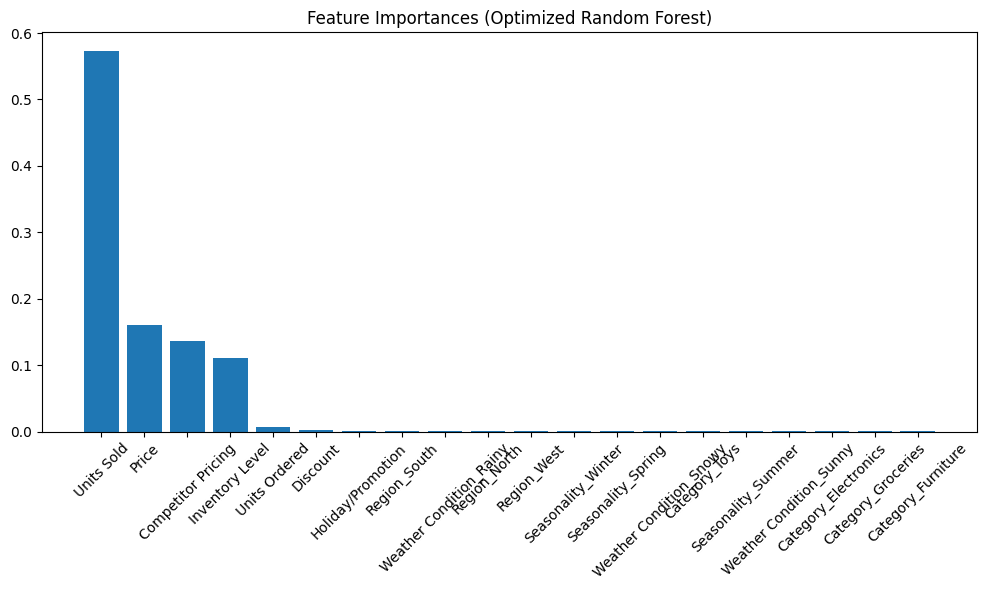

In [110]:
importance = best_rf_model.feature_importances_
indices = np.argsort(importance)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Optimized Random Forest)")
plt.bar(range(len(features)), importance[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=45)
plt.tight_layout()
plt.show()

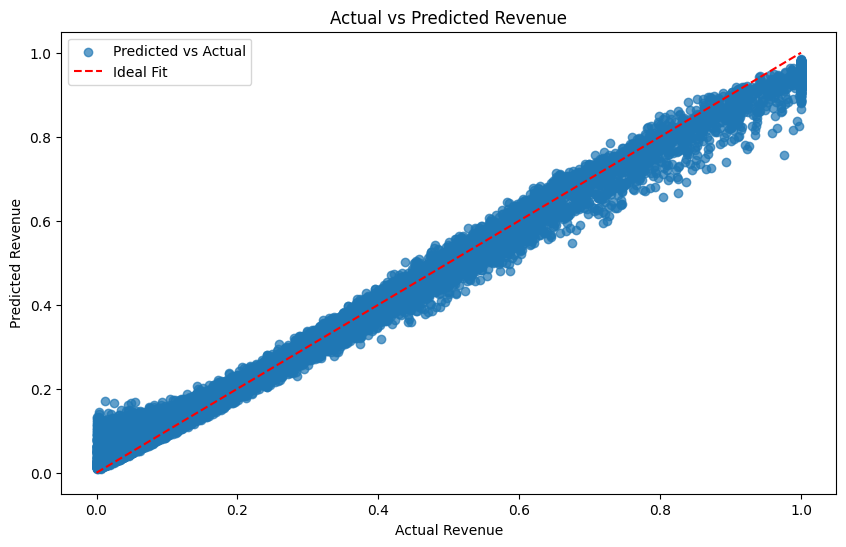

In [112]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.legend()
plt.show()